# 0. Setup

In [1]:
! pip install transformers newspaper3k datasets urllib3==1.25.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.8 MB 14.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 211 kB 78.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 452 kB 76.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 127 kB 80.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 76.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.6 MB 57.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 81 kB 10.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [2]:
import urllib3
import os
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from newspaper import Article
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import datasets
from datasets import load_dataset
import transformers
from transformers import pipeline
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import spacy

In [4]:
import spacy

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
MAIN_FOLDER = '/content/drive/MyDrive/url_classification/'
HTML_FOLDER = MAIN_FOLDER + 'html_files_Nov-24-2022/'
os.chdir(MAIN_FOLDER)

# 0.1 Defining variables

In [7]:
URL = 'url'
TARGET = 'label'
TEXT = 'text'

# Constants that will disappear when transitioning to functions:
# Cell 1

html_folder = HTML_FOLDER
# Cell 2

# Name of the file that will origin 'df_text1'
csv_path1 = 'activities_unlabeled.csv'
usecols1 = ['File Name', 'Label']

nlp = spacy.load('en_core_web_sm')

In [8]:
# Name of the file that will origin 'df_text2'
csv_path = 'activities_labeled13.csv'
usecols = ['url', 'true_label']

In [9]:
# Cell 8

# Defining the classes that we are going to be working with and their encoded labels
labels_encoded = {'Article': 0, 'Blog': 1, 'Event': 2, 'Webinar': 3, 'PR': 4, 'MISC': 5}

labels_decoded = {y: x for x, y in labels_encoded.items()}
maximum_classes = len(labels_encoded)

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9A-Za-z #+_]')
STOPWORDS = set(stopwords.words('english'))

# 0.2 Functions

## Saving/loading variables

In [11]:
def save_variable(variable, variable_name):
  with open(f'./saved_variables/{variable_name}.pickle', 'wb') as f:
    pickle.dump(variable, f)

def read_variable(variable_name):
  with open(f'./saved_variables/{variable_name}.pickle', 'rb') as f:
    variable = pickle.load(f)
  return variable

def check_if_exists(variable_name):
  if variable_name in globals():
    print(f'Variable "{variable_name}" exists.')
  else:
    print(f'Variable "{variable_name}" does not exist.')

## Preprocessing

In [12]:
def get_most_common_tokens(df, column, amount=10):
  tokenized = [word_tokenize(string) for string in df[column]]
  flat_list = [item for sublist in tokenized for item in sublist]
  return Counter(flat_list).most_common(amount)

## Modeling

In [13]:
def fit_model(clf, X_train_transformed, y_train):
  clf.fit(X_train_transformed, y_train)
  return clf


def predict(clf, X_test_transformed):
  y_pred = clf.predict(X_test_transformed)
  return y_pred


def get_accuracy(y_test, y_pred):
  accuracy = sum(y_pred == y_test) / len(y_test)
  return accuracy


def print_important_features(clf, features=5):
  """ 
  Get the most important features of a classifier when using a linear kernel (e.g. Logistic Regression, not SVM)
  """
  coef_importances = np.argsort(clf.coef_, axis=1)
  
  for i, class_ in enumerate(coef_importances[:, :features]):
      print(f'Class "{labels_decoded[clf.classes_[i]]}" - {features} most important features: '
            f'{vectorizer.get_feature_names_out()[class_]}')
      

def print_confusion_matrix(y_test, y_pred, with_report=False):

  accuracy = get_accuracy(y_test, y_pred)

  y_test = list(map(lambda x: labels_decoded[x], y_test))
  y_pred = list(map(lambda x: labels_decoded[x], y_pred))

  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.title(f'Confusion matrix - acc {accuracy:.3f}', size=15)
  plt.show()
  if with_report:
    print('\n' + classification_report(y_test, y_pred))


def get_best_clf(clfs, X_train, X_test, y_train, y_test):
    results = []
    best_clf = None
    best_clf_name = None
    best_accuracy = 0

    for clf_name, clf in clfs:
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test) # accuracy score
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_clf = clf
            best_clf_name = clf_name

        results.append({'clf': clf_name,
                        'accuracy': acc})
        
    print(pd.DataFrame(results).set_index('clf'))
    return best_clf, best_clf_name, best_accuracy


def print_train_val_len_start(train_index, val_index):
    print(f'TRAIN index len: {len(train_index)}, start: {train_index[:3]}, '
          f'\tVALIDATION index len: {len(val_index)}, start: {val_index[:3]}')

def print_val_scores(scores, extra_info=False):
    print(f'Cross validation scores: mean: {np.mean(scores):.3f}, all: {[round(score, 3) for score in scores]}')
    if extra_info:
        print('(std: {np.std(scores):.3f}, min: {min(scores):.3f}, max: {max(scores):.3f})')


def create_misclassified_df(X_test, y_test, y_pred):
  if type(y_pred) == np.ndarray and type(y_test) == pd.core.series.Series:
    y_pred = pd.Series(y_pred, index=y_test.index) # setting y_pred to same type and indexes as y_test
  
  mask = y_pred != y_test
  
  if type(y_pred) == np.ndarray and type(y_test) == np.ndarray:
    y_pred = pd.Series(y_pred)
    y_test = pd.Series(y_test)
    
  df = X_test.copy()[mask]
  df['y_true'] = y_test[mask].replace(labels_decoded)
  df['y_pred'] = y_pred[mask].replace(labels_decoded) 
  return df
  

# 0.3 (Optional) Load df_text1

In [14]:
check_if_exists('df_text1')
df_text1 = read_variable('df_text1')
check_if_exists('df_text1')
df_text1

Variable "df_text1" does not exist.
Variable "df_text1" exists.


text         label
0    2020 User Summit. 2020 User Summit  *UPDATE - ...         Event
1    When Is ADA Compliance Legally Required?. The ...   White Paper
2    Write For Us. Want to Write for Us?  Digital L...          MISC
3    Write for Us. Yes, you. We‚Äôre always looking f...          MISC
4    FAQs for some new features available in the Be...          Blog
..                                                 ...           ...
456  The Art of SEO, 2nd Edition. Four acknowledged...  Product Page
457  Submit A Guest Post ‚Äì Guidelines (Write for Us...          MISC
458  Fully Managed Magento Hosting ‚Äî JetRails. Full...          MISC
459  Mission-Critical Hosting For Magento Open Sour...          MISC
460  How to Write an Engaging Title Tag for Better ...          Blog

[461 rows x 2 columns]

# 0.4 (Optional) Load "df_text2"

In [15]:
VARIABLE = 'df_text2'

check_if_exists(VARIABLE)
print(f'Reading variable "{VARIABLE}"...')
df_text2 = read_variable(VARIABLE)
check_if_exists(VARIABLE)

Variable "df_text2" does not exist.
Reading variable "df_text2"...
Variable "df_text2" exists.


In [16]:
df_text2

url  \
0     http://www.nctech.org/events/event/2021/awards...   
1                             http://cdd-biologics.com/   
2                                 http://sfesummit.com/   
3      http://www.obviohealth.com/events/informa-1-2021   
4                     http://www.genesisconference.com/   
...                                                 ...   
1014         http://www.entrepreneur.com/article/400416   
1015  http://www.koreabiomed.com/news/articleView.ht...   
1016  http://www.finsmes.com/2021/10/science-37-clos...   
1017  http://seekingalpha.com/article/4450420-labora...   
1018  http://washingtontechnology.com/companies/2022...   

                                                   text    label  
0     NC TECH Awards Gala. #nctechawards  Awards Gal...    Event  
1     Computational Drug Development for Biologics 2...    Event  
2     12th Annual Sales Force Effectiveness & Digita...    Event  
3     ObvioHealth. MAGI Clinical Research Conference...  Webinar  
4                                 Home : Genesis 2022.     Event  
...                                                 ...      ...  
1014  Veeva Systems is a Top Stock for 2022. Veeva S...  Article  
1015  Medidata‚Äôs Acorn AI solution raises clinical t...  Article  
1016  Science 37 Closes Business Combination with Li...        ?  
1017  Laboratory Corp: 18%-20% Yearly Return With Sa...        -  
1018  Accenture‚Äôs federal arm hires new applied inte...  Article  

[1019 rows x 3 columns]

# 0.5 (Optional) Load "df_text"

In [17]:
VARIABLE = 'df_text'

check_if_exists(VARIABLE)
print(f'Reading variable "{VARIABLE}"...')
df_text = read_variable(VARIABLE)
check_if_exists(VARIABLE)

Variable "df_text" does not exist.
Reading variable "df_text"...
Variable "df_text" exists.


# 0.6 (Optional) Create and save "df_text1" - general preprocessing of html

In [ ]:
# Important cell # 1
html_files = os.listdir(html_folder)

In [ ]:
# Important cell # 2

df1 = pd.read_csv(csv_path1, usecols=usecols)
df1.rename(columns={usecols1[0]: 'filename', usecols1[1]: TARGET}, inplace=True)
df1 = df1[~df1['filename'].isna()]
print(f'Original shape: {df1.shape}')
df1 = df1[df1[TARGET] != '-']
df1.reset_index(drop=True, inplace=True)
print(f'Final shape: {df1.shape}')

In [ ]:
# Important cell # 3
df1[TARGET].value_counts(normalize=False)

In [ ]:
# Important cell # 4
filenames = df1['filename'].values
htmls = list()

for i, filename in enumerate(filenames):
  try:
    with open(f'{HTML_FOLDER}{filename}') as f:
      html = f.read()
      htmls.append(html)
  except FileNotFoundError:
    print(f'File {i} not found: "{filename}"')

In [ ]:
# Important cell # 5
toi_articles = list()

for html in htmls:
  toi_article = Article(url = ' ', language = "en")
  toi_article.set_html(html)
  toi_article.parse()
  toi_article.nlp()
  toi_articles.append(toi_article)

In [ ]:
# Important cell # 6
y = df1[TARGET].tolist()

In [ ]:
# Important cell # 7
summaries = [(toi_article.title + '. ' + toi_article.text).replace('\n', ' ') for toi_article in toi_articles]

In [ ]:
len(y), len(summaries)

In [ ]:
# Important cell # 7.5
df_text1 = pd.DataFrame({TEXT: summaries, TARGET: y})

In [ ]:
df_text1

In [ ]:
save_variable(df_text1, 'df_text1')

# 0.7 (Optional) Create and save "df_text2" - general preprocessing of urls

In [ ]:
csv_path

'activities_labeled13.csv'

In [ ]:
df_data = pd.read_csv(csv_path, usecols=usecols)
df_data.rename(columns={usecols[1]: TARGET}, inplace=True)
df_data = df_data[~df_data[TARGET].isna()]
df_data.reset_index(drop=True, inplace=True)

# All sections of blogs labeled as 'MISC/Blog?' become part of 'MISC'.
df_data.loc[df_data[TARGET] == 'MISC/Blog?', TARGET] = 'MISC'

In [ ]:
VARIABLE = 'labels_old'

try:
  labels_old = read_variable(VARIABLE)
  print(f'Variable {VARIABLE} already existed and contains {len(labels_old)} elements.')
except FileNotFoundError:
  labels_old = list()
  print(f'Variable {VARIABLE} was just created and contains {len(labels_old)} elements.')

Variable labels_old already existed and contains 953 elements.


In [ ]:
VARIABLE = 'indexes_old'

try:
  indexes_old = read_variable(VARIABLE)
  print(f'Variable {VARIABLE} already existed and contains {len(indexes_old)} elements.')
except FileNotFoundError:
  indexes_old = list()
  print(f'Variable {VARIABLE} was just created and contains {len(indexes_old)} elements.')

Variable indexes_old already existed and contains 953 elements.


In [ ]:
VARIABLE = 'texts_old'

try:
  texts_old = read_variable(VARIABLE)
  print(f'Variable {VARIABLE} already existed and contains {len(texts_old)} elements.')
except FileNotFoundError:
  texts_old = list()
  print(f'Variable {VARIABLE} was just created and contains {len(texts_old)} elements.')

Variable texts_old already existed and contains 953 elements.


In [ ]:
VARIABLE = 'urls_old'

try:
  urls_old = read_variable(VARIABLE)
  print(f'Variable {VARIABLE} already existed and contains {len(urls_old)} elements.')
except FileNotFoundError:
  urls_old = list()
  print(f'Variable {VARIABLE} was just created and contains {len(urls_old)} elements.')

Variable urls_old already existed and contains 1158 elements.


In [ ]:
urls = df_data['url']

# We use a mask to select the elements that are in 'urls' and not in 'urls_old' to create 'urls_new'.
mask = np.isin(urls, urls_old)
urls_new = urls[~mask]
print(f'There are {len(urls_new)} URLs to read.')

There are 88 URLs to read.


In [ ]:
# Important cell # 5
texts_new = list()
indexes_new = list()

idx_label_to_remove = list()
idx_label = 0

for i, url in enumerate(urls_new, len(urls_old)):
  try:
    toi_article = Article(url = url, language = "en")
    toi_article.download()
    toi_article.parse()
    toi_article.nlp()
    text = (toi_article.title + '. ' + toi_article.text).replace('\n', ' ')
    texts_new.append(text)
    indexes_new.append(i)
    print(f'{i}: url "{url}" read successfully.')
  except Exception:
    idx_label_to_remove.append(idx_label)
    print(f'{i}: ERROR: url "{url}" was not read successfully.')
  
  idx_label += 1

1158: url "http://seekingalpha.com/news/3739294-iqvia-partners-with-nrx-pharma-to-support-regulatory-pathway-for-covid-19-therapy" read successfully.
1159: url "http://www.healthcareitnews.com/news/emea/iqvia-partners-saudi-data-and-artificial-intelligence-authority-sdaia" read successfully.
1160: url "http://www.businesswire.com/news/home/20210805005130/en/Verily-Opens-New-RD-Center-in-Israel-Focused-on-the-Application-of-AI-in-Healthcare/?feedref=JjAwJuNHiystnCoBq_hl-RLXHJgazfQJNuOVHefdHP-D8R-QU5o2AvY8bhI9uvWSD8DYIYv4TIC1g1u0AKcacnnViVjtb72bOP4-4nHK5ieT3WxPE8m_kWI77F87CseT" read successfully.
1161: url "http://www.streetinsider.com/Press+Releases/StudyKIK%2C+A+Global+Clinical+Trial+Patient+Recruitment+%26amp%3B+Retention+Technology+Company%2C+Appoints+Kevin+Vass+as+Chief+Financial+Officer/18389562.html" read successfully.
1162: ERROR: url "http://www.bizjournals.com/sanfrancisco/news/2021/12/21/verily-google-andy-conrad-stephen-gillett.html?ana=RSS&s=article_search" was not read succ

In [ ]:
print(f'When reading the new URLs, {len(urls_new) - len(indexes_new)} of them threw an error and could not be read.')

When reading the new URLs, 22 of them threw an error and could not be read.


In [ ]:
labels_new = df_data.loc[urls_new.index, TARGET]

In [ ]:
assert (labels_new == df_data.loc[labels_new.index, TARGET]).all()

In [ ]:
labels_new.reset_index(drop=True, inplace=True)
labels_new = labels_new.drop(idx_label_to_remove).tolist()

In [ ]:
labels = labels_old + labels_new
indexes = indexes_old + indexes_new
texts = texts_old + texts_new
# We change the type and order of urls, deleting also the ones repeated in 'urls_old' and 'urls_new'
urls = urls_old + urls_new.tolist()

In [ ]:
assert len(texts) == len(pd.Series(urls).loc[indexes]) == len(indexes) == len(labels)

In [ ]:
df_text2 = pd.DataFrame({
    URL: pd.Series(urls).loc[indexes],
    TEXT: texts,
    TARGET: labels,
    }).reset_index(drop=True)

In [ ]:
save_variable(labels, 'labels_old')
save_variable(indexes, 'indexes_old')
save_variable(texts, 'texts_old')
save_variable(urls, 'urls_old')
save_variable(df_text2, 'df_text2')

# 0.8 (Optional) Create and save "df_text"

In [ ]:
if df_text2[URL].duplicated().sum() == 0:
  print(f'There are no duplicate URLs or texts in df_text2.')
else:
  original_amount = df_text2.shape[0]
  df_text2 = df_text2[~df_text2[URL].duplicated()]
  print(f"{original_amount - df_text2.shape[0]} URLs were duplicates and hence deleted.")
  assert df_text2[URL].duplicated().sum() == 0

69 URLs were duplicates and hence deleted.


In [ ]:
df_text = pd.concat([df_text1, df_text2]).reset_index(drop=True)

In [ ]:
if df_text[TEXT].duplicated().sum() == 0:
  print(f'There are no duplicate URLs or texts in df_text.')
else:
  original_amount = df_text.shape[0]
  df_text = df_text[~df_text[TEXT].duplicated()]
  print(f"{original_amount - df_text.shape[0]} texts were duplicates and hence deleted.")
  assert df_text[TEXT].duplicated().sum() == 0

59 texts were duplicates and hence deleted.


In [ ]:
# import seaborn as sns
# values = df_text['text'].str.split().str.len()
# sns.boxplot(x=values)
# plt.show()

In [ ]:
df_text = df_text[~df_text[TEXT].str.contains('404 status code')]

In [ ]:
THRESHOLD1 = 50
THRESHOLD2 = 51

characters = df_text[TEXT].str.split().str.len()
df_text.loc[(characters >= THRESHOLD1) & (characters <= THRESHOLD2), TEXT].tolist()

['Carlisle Law: Expert creditors‚Äô rights legal counsel, proven results. Who We Are  Since 1970, Carlisle Law has built our practice on the aggressive defense of creditors‚Äô rights. A full-service firm, we are focused on the representation of lenders, mortgagees, landlords, financial institutions, investors, tax certificate holders, and distressed asset purchasers.',
 'Website Performance Testing and Monitoring. See how your page loads on different devices  Test your page on a real Android device or on over 30 different Simulated Device options.  Analyze your performance with iPhones, iPads, Samsung Galaxy/Note, Google Nexus/Pixel phones, and other popular devices.  Mobile Testing only available with GTmetrix PRO.',
 'Immuno-Oncology 360¬∞. Setting new standards in information exchange for the pharmaceutical and biotech industry  Designed by lead Advisors Dr Axel Hoos (GSK) and Dr James Gulley (NCI), the program provided a unique 360-degree approach addressing the business aspects, c

In [ ]:
# By analizing the texts, errors started to show up in the ones that had below 51 words.

fraction_ignored = 0.165 # We will lose 16.5% of our data

values = df_text['text'].str.split().str.len()
minimum_words = values.quantile(fraction_ignored)
minimum_words

51.0

In [ ]:
values.describe()[['25%', '75%']]

25%     80.0
75%    593.0
Name: text, dtype: float64

In [ ]:
df_text[TARGET].value_counts()

Webinar                  208
Event                    206
Blog                     202
Home Page                196
PR                       151
MISC                     110
Article                   87
-                         57
Product Page              44
?                         14
Podcast                   14
White Paper               13
Digital event             11
Video Content              9
Education                  6
Article/PR                 5
Home Page/Event            3
Webcast                    3
About Page                 2
Press Release              2
PR (w Blog label)          2
Virtual Summit             1
Publication                1
Webinar ended              1
Past webinar               1
LinkedIn                   1
Google Form for Event      1
Name: label, dtype: int64

In [ ]:
df_text.shape

(1351, 3)

In [ ]:
if maximum_classes:
  df_text = df_text[df_text[TARGET].isin(labels_encoded)]

df_text.reset_index(drop=True, inplace=True)

In [ ]:
df_text.shape

(964, 3)

In [ ]:
# Important cell # 8

# If the text a URL contains is below this threshold, it gets discarded
minimum_words = 51

if minimum_words:
  df_text = df_text[df_text[TEXT].str.split().str.len() >= minimum_words]

In [ ]:
df_text.shape

(857, 3)

In [ ]:
# DISTILBERT_EMBEDDINGS = 768
# (df_text[TEXT].str.split().str.len() > DISTILBERT_EMBEDDINGS).sum()

In [ ]:
# df_text.loc[df_text[TEXT].str.split().str.len() > DISTILBERT_EMBEDDINGS, TEXT].str.split().str.len()

In [ ]:
df_text.shape[0]

857

In [ ]:
df_text[TARGET].value_counts()

Blog       198
Event      174
Webinar    172
PR         150
Article     86
MISC        77
Name: label, dtype: int64

In [ ]:
# Important cell # 8
def clean_text(text):
    """
    @text: a string
    Returns a modified version of the initial string
    """
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

print(f"Amount of words before cleaning text: {df_text[TEXT].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before cleaning text: {np.unique(np.concatenate(df_text[TEXT].str.split().values, axis=0)).shape[0]}\n")
df_text['cleaned_text'] = df_text[TEXT].apply(clean_text)
print(f"Amount of words after cleaning text: {df_text['cleaned_text'].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before cleaning text: {np.unique(np.concatenate(df_text['cleaned_text'].str.split().values, axis=0)).shape[0]}")

Amount of words before cleaning text: 588737
Amount of unique words before cleaning text: 50526

Amount of words after cleaning text: 367289
Amount of unique words before cleaning text: 30237


In [ ]:
def lemmatize_text(text):
    lemmatized = ' '.join(token.lemma_ for token in nlp(text))
    return lemmatized

print(f"Amount of words before lemmatizing text: {df_text[TEXT].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before lemmatizing text: {np.unique(np.concatenate(df_text[TEXT].str.split().values, axis=0)).shape[0]}\n")
df_text['lemmatized_text'] = df_text[TEXT].apply(lemmatize_text)
print(f"Amount of words after lemmatizing text: {df_text['lemmatized_text'].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before lemmatizing text: {np.unique(np.concatenate(df_text['lemmatized_text'].str.split().values, axis=0)).shape[0]}")

Amount of words before lemmatizing text: 588737
Amount of unique words before lemmatizing text: 50526

Amount of words after lemmatizing text: 707420
Amount of unique words before lemmatizing text: 23242


In [ ]:
print(f"Amount of words before cleaning lemmatized text: {df_text['lemmatized_text'].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before cleaning lemmatized text: {np.unique(np.concatenate(df_text['lemmatized_text'].str.split().values, axis=0)).shape[0]}\n")
df_text['lemmatized_cleaned_text'] = df_text['lemmatized_text'].apply(clean_text)
print(f"Amount of words after cleaning lemmatized text: {df_text['lemmatized_cleaned_text'].apply(lambda x: len(x.split(' '))).sum()}")
print(f"Amount of unique words before cleaning lemmatized text: {np.unique(np.concatenate(df_text['lemmatized_cleaned_text'].str.split().values, axis=0)).shape[0]}")

Amount of words before cleaning lemmatized text: 707420
Amount of unique words before cleaning lemmatized text: 23242

Amount of words after cleaning lemmatized text: 351888
Amount of unique words before cleaning lemmatized text: 21922


In [ ]:
df_text.head(3) # df with different techniques for preprocessing of the text

text  label  url  \
0  2020 User Summit. 2020 User Summit  *UPDATE - ...  Event  NaN   
1  Write For Us. Want to Write for Us?  Digital L...   MISC  NaN   
2  Write for Us. Yes, you. We‚Äôre always looking f...   MISC  NaN   

                                        cleaned_text  \
0  2020 User Summit 2020 User Summit UPDATE March...   
1  Write For Us Want Write Us Digital Lamp one fa...   
2  Write Us Yes Were always looking new authors I...   

                                     lemmatized_text  \
0  2020 User Summit . 2020 User Summit   * update...   
1  write for we . want to write for we ?   Digita...   
2  write for we . yes , you . we ‚Äôre always look ...   

                             lemmatized_cleaned_text  
0  2020 User Summit 2020 User Summit update March...  
1  write want write Digital Lamp one fast grow te...  
2  write yes always look new author get idea chal...

In [ ]:
df_text.loc[0, TEXT]

"2020 User Summit. 2020 User Summit  *UPDATE - March 12th, 2020*  With the ongoing coverage of the seriousness of the global outbreak of the COVID-19 virus and the potential effects, we want you to know that our priority is to keep our Summit attendees safe and informed.  While our AC User Summit is just more than a month away, we are sensitive to our clients' travel and safety. Out of an abundance of caution and concern, we have decided to cancel the 2020 User Summit in the best interest of all involved.  While we hope that we all can and will participate in normal activities as much as possible at this time, this is a unique situation that requires extra consideration for our clients and our employees.  Registration fees will be credited back to all clients who have registered for the Summit.  Thank you for your patience and understanding as we work through unprecedented times together."

In [ ]:
# df_text.loc[0, 'lemmatized_text']

In [ ]:
# df_text.loc[0, 'lemmatized_cleaned_text']

In [ ]:
def lemmatize_text2(text):
  lemmatized = ' '.join(token.text.lower() for token in nlp(text))
  return lemmatized

df_text['w2v_text'] = df_text[TEXT].apply(lemmatize_text2)

In [ ]:
# print(f"Amount of words before tokenizing text: {df_text[TEXT].apply(lambda x: len(x.split(' '))).sum()}")
# print(f"Amount of unique words before tokenizing text: {np.unique(np.concatenate(df_text[TEXT].str.split().values, axis=0)).shape[0]}\n")
# tokenized = [word_tokenize(string) for string in df_text[TEXT]]
# df_text['tokenized'] = list(map(lambda x: ' '.join(x), tokenized))
# print(f"Amount of words after tokenizing text: {df_text['tokenized'].apply(lambda x: len(x.split(' '))).sum()}")
# print(f"Amount of unique words before tokenizing text: {np.unique(np.concatenate(df_text['tokenized'].str.split().values, axis=0)).shape[0]}")

In [ ]:
save_variable(df_text, 'df_text')

In [ ]:
# df_text = read_variable('df_text')

In [ ]:
df_text[TARGET].value_counts()

Blog       198
Event      174
Webinar    172
PR         150
Article     86
MISC        77
Name: label, dtype: int64

# 0.9 Further EDA and preprocessing on "df_text"

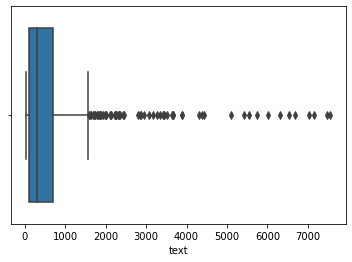

In [ ]:
import seaborn as sns
values = df_text['text'].str.split().str.len()
sns.boxplot(x=values)
plt.show()

values = df_text['text'].str.split().str.len()
minimum_words = values.quantile(0.15) # we ignore 15 % of the data, making sure the threshold ignores all outliers (< 0.25)
minimum_words

values.describe()[['25%', '75%']]

In [ ]:
values = df_text['text'].str.split().str.len()
minimum_words = values.quantile(0.15) # we ignore 15 % of the data, making sure the threshold ignores all outliers (< 0.25)
minimum_words

72.0

In [ ]:
values.describe()[['25%', '75%']]

25%    110.5
75%    697.5
Name: text, dtype: float64

In [ ]:
df_text

text         label  \
0    Write For Us. Want to Write for Us?  Digital L...          MISC   
1    Write for Us. Yes, you. We‚Äôre always looking f...          MISC   
2    FAQs for some new features available in the Be...          Blog   
3    The Web Credibility Project. Our research in W...     Home Page   
4    Model DJs for Retail. DJPeoples is the nation‚Äô...          MISC   
..                                                 ...           ...   
326  Teach Yourself Visually Search Engine Optimiza...  Product Page   
327  The Art of SEO, 2nd Edition. Four acknowledged...  Product Page   
328  Submit A Guest Post ‚Äì Guidelines (Write for Us...          MISC   
329  Fully Managed Magento Hosting ‚Äî JetRails. Full...          MISC   
330  Mission-Critical Hosting For Magento Open Sour...          MISC   

                                          cleaned_text  \
0    Write For Us Want Write Us Digital Lamp one fa...   
1    Write Us Yes Were always looking new authors I...   
2    FAQs new features available Beta Wayback Machi...   
3    The Web Credibility Project Our research Web c...   
4    Model DJs Retail DJPeoples nations premier age...   
..                                                 ...   
326  Teach Yourself Visually Search Engine Optimiza...   
327  The Art SEO 2nd Edition Four acknowledged expe...   
328  Submit A Guest Post Guidelines Write Us We acc...   
329  Fully Managed Magento Hosting JetRails Fully M...   
330  MissionCritical Hosting For Magento Open Sourc...   

                                       lemmatized_text  \
0    write for we . want to write for we ?   Digita...   
1    write for we . yes , you . we ‚Äôre always look ...   
2    FAQs for some new feature available in the Bet...   
3    the web Credibility Project . our research in ...   
4    Model dj for Retail . djpeople be the nation ‚Äô...   
..                                                 ...   
326  teach yourself Visually Search Engine Optimiza...   
327  the art of seo , 2nd Edition . four acknowledg...   
328  submit a Guest Post ‚Äì Guidelines ( write for U...   
329  fully manage Magento Hosting ‚Äî JetRails . full...   
330  mission - Critical Hosting for Magento Open So...   

                               lemmatized_cleaned_text  \
0    write want write Digital Lamp one fast grow te...   
1    write yes always look new author get idea chal...   
2    FAQs new feature available Beta Wayback Machin...   
3    web Credibility Project research web credibili...   
4    Model dj Retail djpeople nation premier agency...   
..                                                 ...   
326  teach Visually Search Engine Optimization whet...   
327  art seo 2nd Edition four acknowledge expert se...   
328  submit Guest Post Guidelines write Us accept G...   
329  fully manage Magento Hosting JetRails fully ma...   
330  mission Critical Hosting Magento Open Source A...   

                                              w2v_text  
0    write for us . want to write for us ?   digita...  
1    write for us . yes , you . we ‚Äôre always looki...  
2    faqs for some new features available in the be...  
3    the web credibility project . our research in ...  
4    model djs for retail . djpeoples is the nation...  
..                                                 ...  
326  teach yourself visually search engine optimiza...  
327  the art of seo , 2nd edition . four acknowledg...  
328  submit a guest post ‚Äì guidelines ( write for u...  
329  fully managed magento hosting ‚Äî jetrails . ful...  
330  mission - critical hosting for magento open so...  

[331 rows x 6 columns]

In [ ]:
df_text['w2v_text'].tolist()

['write for us . want to write for us ?   digital lamp , is one of the fastest - growing tech blog . we allow you an endless opportunity for new authors , technical content writers , freelance content writing professionals , and guest writers to technology + ‚Äú write for us ‚Äù + guest post ( contribute or submit guest post article ) about the topics related to technology , business , internet , gadgets , digital marketing , security , seo , tech blog , etc .   technology is the way progressive for online businesses . why not share your expertise by guest blogging on technology blogs to highlight awareness of this emerging trend .   you will obtain the benefits of being a guest blogger by establishing yourself as an authority in the industry . on top of that , you will build social proof , create a robust online presence , develop new relationships with bloggers and readers and rank better in the search engines .   all you need to do is meet the criteria set out by the technology blog

In [ ]:
df_text[TARGET].value_counts()

0    128
7    124
1    110
6     85
2     79
5     66
4     55
3     44
Name: label, dtype: int64

In [ ]:
# df_text[TARGET].replace({1: 5}, inplace=True) # make Blog and Article a single category

In [ ]:
df_text[TARGET].value_counts()

5    176
0    128
7    124
6     85
2     79
4     55
3     44
Name: label, dtype: int64

In [ ]:
labels_encoded

{'Home Page': 0,
 'Blog': 1,
 'MISC': 2,
 'Product Page': 3,
 'Event': 4,
 'Article': 5,
 'Webinar': 6,
 'PR': 7}

# 1. Bag of Words approach

## Preprocessing

In [18]:
labels_encoded

{'Article': 0, 'Blog': 1, 'Event': 2, 'Webinar': 3, 'PR': 4, 'MISC': 5}

In [19]:
df_text[TARGET] = df_text[TARGET].replace(labels_encoded)

In [20]:
# # Working only with df_text2
# df_text = df_text[(df_text['url'] != 'Not provided') & (df_text[TARGET].isin([7, 6, 4, 1, 5]))]

In [21]:
df_text[TARGET].value_counts()

1    198
2    174
3    172
4    150
0     86
5     77
Name: label, dtype: int64

In [22]:
df_text.shape[0]

857

In [23]:
# df_positive = df_text[df_text[TARGET] != 5]
# df_negative = df_text[df_text[TARGET] == 5]

# Cell 9
test_size = 0.2
random_state = 0

# Important cell # 9
column_used = 'lemmatized_cleaned_text'

# X = df_positive[[column_used]]
# y = df_positive[TARGET]
X = df_text[[column_used]]
y = df_text[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size,
                                                    stratify=y, 
                                                    random_state=random_state
                                                    )

# X_misc = df_negative[[column_used]]
# y_misc = df_negative[TARGET]
# X_test = pd.concat([X_test, X_misc])
# y_test = pd.concat([y_test, y_misc])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((685, 1), (172, 1), (685,), (172,))

In [24]:
# Important cell # 10
majority_class = y_train.value_counts().index[0]
baseline_accuracy = sum(y_test == majority_class) / len(y_test)
print(f'Baseline accuracy: {baseline_accuracy:.4f}')

Baseline accuracy: 0.2326


In [25]:
get_most_common_tokens(df=df_text, column='lemmatized_cleaned_text', amount=10)

[('use', 2189),
 ('patient', 1949),
 ('clinical', 1801),
 ('trial', 1733),
 ('datum', 1646),
 ('company', 1532),
 ('I', 1511),
 ('make', 1432),
 ('content', 1423),
 ('need', 1275)]

In [26]:
# Important cell # 11
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tr = vectorizer.fit_transform(X_train[column_used])
X_test_tr = vectorizer.transform(X_test[column_used])

In [27]:
X_train_tr.toarray().shape, X_test_tr.toarray().shape

((685, 440643), (172, 440643))

In [28]:
# import string

# # STOPWORDS = stop_words.ENGLISH_STOP_WORDS

# #Function for basic cleaning/preprocessing texts
# def clean(doc):
#     # Removal of punctuation marks (.,/\][{} etc) and numbers
#     doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
#     # Removal of stopwords
#     doc = " ".join([token for token in doc.split() if token not in STOPWORDS])
#     return doc.lower()

# string.punctuation

## Modeling

In [29]:
clfs = [
    ('LogisticRegression', LogisticRegression(max_iter=3000,
                                              class_weight='balanced')), 
    ('RandomForest', RandomForestClassifier(max_depth=18,
                                            n_estimators=75,
                                            random_state=0)), 
    ('KNN 5', KNeighborsClassifier(n_neighbors=5)),
    ('SVM C1', SVC(C=1, 
                   class_weight='balanced')),
    ('MultinomialNB', MultinomialNB())
]

In [30]:
for clf in clfs:
  print(f'\nStratifiedKFold - classifier: {clf[0]}:\n')
  skf = StratifiedKFold(n_splits=5)
  for train_index, val_index in skf.split(X_train_tr, y_train):
      print_train_val_len_start(train_index, val_index)
      print(f'\tMean y: TRAIN: {y_train.iloc[train_index].mean():.3f},\tVALIDATION: {y_train.iloc[val_index].mean():.3f}')

  scores = cross_val_score(clf[1], 
                          X_train_tr,
                          y_train,
                          cv=5)
  
  print_val_scores(scores)


StratifiedKFold - classifier: LogisticRegression:

TRAIN index len: 548, start: [121 122 125], 	VALIDATION index len: 137, start: [0 1 2]
	Mean y: TRAIN: 2.389,	VALIDATION: 2.394
TRAIN index len: 548, start: [0 1 2], 	VALIDATION index len: 137, start: [121 122 125]
	Mean y: TRAIN: 2.394,	VALIDATION: 2.372
TRAIN index len: 548, start: [0 1 2], 	VALIDATION index len: 137, start: [255 258 260]
	Mean y: TRAIN: 2.387,	VALIDATION: 2.401
TRAIN index len: 548, start: [0 1 2], 	VALIDATION index len: 137, start: [364 370 371]
	Mean y: TRAIN: 2.387,	VALIDATION: 2.401
TRAIN index len: 548, start: [0 1 2], 	VALIDATION index len: 137, start: [481 498 512]
	Mean y: TRAIN: 2.392,	VALIDATION: 2.380
Cross validation scores: mean: 0.750, all: [0.745, 0.788, 0.745, 0.657, 0.818]

StratifiedKFold - classifier: RandomForest:

TRAIN index len: 548, start: [121 122 125], 	VALIDATION index len: 137, start: [0 1 2]
	Mean y: TRAIN: 2.389,	VALIDATION: 2.394
TRAIN index len: 548, start: [0 1 2], 	VALIDATION index

In [31]:
y_train.value_counts(normalize=True)

1    0.230657
2    0.202920
3    0.200000
4    0.175182
0    0.100730
5    0.090511
Name: label, dtype: float64

In [32]:
y_test.value_counts(normalize=True)

1    0.232558
3    0.203488
2    0.203488
4    0.174419
0    0.098837
5    0.087209
Name: label, dtype: float64

Checking results on the test set:

In [33]:
# clf, clf_name, val_acc = get_best_clf(clfs, X_train, X_test, y_train, y_test)
# print(f'Best classifier: {clf_name}, validation accuracy: {val_acc:.3f}, '
#       f'test accuracy: {clf.score(X_test, y_test):.3f}')

clf, clf_name, test_acc = get_best_clf(clfs, X_train_tr, X_test_tr, y_train, y_test)
print(f'Best classifier: {clf_name}, test accuracy: {test_acc:.3f}')

                    accuracy
clf                         
LogisticRegression  0.755814
RandomForest        0.674419
KNN 5               0.645349
SVM C1              0.686047
MultinomialNB       0.529070
Best classifier: LogisticRegression, test accuracy: 0.756


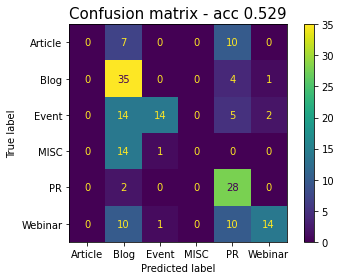


              precision    recall  f1-score   support

     Article       0.00      0.00      0.00        17
        Blog       0.43      0.88      0.57        40
       Event       0.88      0.40      0.55        35
        MISC       0.00      0.00      0.00        15
          PR       0.49      0.93      0.64        30
     Webinar       0.82      0.40      0.54        35

    accuracy                           0.53       172
   macro avg       0.44      0.43      0.38       172
weighted avg       0.53      0.53      0.47       172



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
clf = fit_model(MultinomialNB(),
                X_train_tr, 
                y_train)

y_pred = predict(clf, X_test_tr)

print_confusion_matrix(y_test, y_pred, with_report=True)

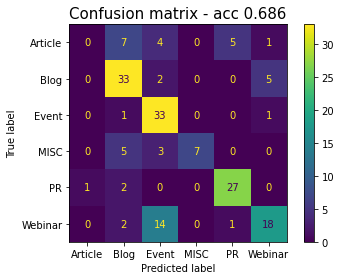


              precision    recall  f1-score   support

     Article       0.00      0.00      0.00        17
        Blog       0.66      0.82      0.73        40
       Event       0.59      0.94      0.73        35
        MISC       1.00      0.47      0.64        15
          PR       0.82      0.90      0.86        30
     Webinar       0.72      0.51      0.60        35

    accuracy                           0.69       172
   macro avg       0.63      0.61      0.59       172
weighted avg       0.65      0.69      0.65       172



In [35]:
clf = fit_model(SVC(C=1, 
                    class_weight='balanced'
                    ),
                X_train_tr, 
                y_train)

y_pred = predict(clf, X_test_tr)

print_confusion_matrix(y_test, y_pred, with_report=True)

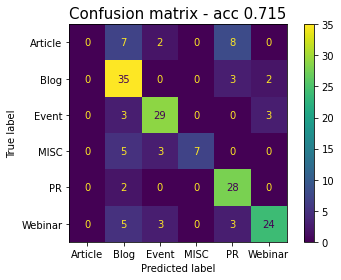


              precision    recall  f1-score   support

     Article       0.00      0.00      0.00        17
        Blog       0.61      0.88      0.72        40
       Event       0.78      0.83      0.81        35
        MISC       1.00      0.47      0.64        15
          PR       0.67      0.93      0.78        30
     Webinar       0.83      0.69      0.75        35

    accuracy                           0.72       172
   macro avg       0.65      0.63      0.62       172
weighted avg       0.67      0.72      0.68       172



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
clf = fit_model(LogisticRegression(max_iter=3000, 
                                  #  class_weight='balanced'
                                   ), 
                X_train_tr, 
                y_train)

y_pred = predict(clf, X_test_tr)

print_confusion_matrix(y_test, y_pred, with_report=True)

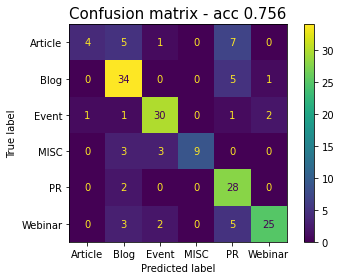


              precision    recall  f1-score   support

     Article       0.80      0.24      0.36        17
        Blog       0.71      0.85      0.77        40
       Event       0.83      0.86      0.85        35
        MISC       1.00      0.60      0.75        15
          PR       0.61      0.93      0.74        30
     Webinar       0.89      0.71      0.79        35

    accuracy                           0.76       172
   macro avg       0.81      0.70      0.71       172
weighted avg       0.79      0.76      0.74       172



In [37]:
clf = fit_model(LogisticRegression(
    max_iter=3000, 
    class_weight='balanced'
    ), 
    X_train_tr, 
    y_train,
    )

y_pred = predict(clf, X_test_tr)

print_confusion_matrix(y_test, y_pred, with_report=True)

In [38]:
X_train_tr.toarray().shape

(685, 440643)

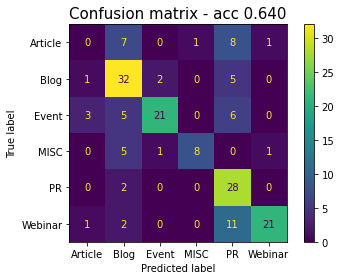


              precision    recall  f1-score   support

     Article       0.00      0.00      0.00        17
        Blog       0.60      0.80      0.69        40
       Event       0.88      0.60      0.71        35
        MISC       0.89      0.53      0.67        15
          PR       0.48      0.93      0.64        30
     Webinar       0.91      0.60      0.72        35

    accuracy                           0.64       172
   macro avg       0.63      0.58      0.57       172
weighted avg       0.67      0.64      0.62       172



In [39]:
clf = fit_model(LogisticRegression(
    max_iter=3000, 
    class_weight='balanced',
    solver='liblinear', # default: 'lbfgs' 
    penalty='l1', # default: 'l2'
    ), 
    X_train_tr, 
    y_train,
    )

y_pred = predict(clf, X_test_tr)

print_confusion_matrix(y_test, y_pred, with_report=True)

In [40]:
print_important_features(clf, features=5)

Class "Article" - 5 most important features: ['000' 'poolside' 'pooling take place' 'pooling take'
 'pooling result manage']
Class "Blog" - 5 most important features: ['clinical' 'iqvia' '000' 'pooling result manage' 'pooling result']
Class "Event" - 5 most important features: ['patient' 'iqvia' 'trial' 'poolside' 'pooling take place']
Class "Webinar" - 5 most important features: ['000' 'pooling take' 'pooling result manage' 'pooling result'
 'pooling offer high']
Class "PR" - 5 most important features: ['000' 'pooling take place' 'pooling take' 'pooling result manage'
 'pooling result']
Class "MISC" - 5 most important features: ['patient' '000' 'pooling take place' 'pooling take'
 'pooling result manage']


In [41]:
misclassified_df = create_misclassified_df(X_test, y_test, y_pred)
assert (misclassified_df['y_true'] != misclassified_df['y_pred']).all()
misclassified_df

lemmatized_cleaned_text   y_true   y_pred
932  IQVIA IQV buy remain Q2 Solutions Stake Ups EP...       PR     Blog
821  reduce Clinical Trial Costs use decentralize c...     Blog       PR
713  CVS ink deal Medable enroll patient clinical t...  Article       PR
680  California end Verily covid19 testing partners...  Article       PR
880  Power Patient Centricity Rare Disease Studies ...     Blog       PR
..                                                 ...      ...      ...
308  outsource Clinical Trials West Coast 2023 comp...    Event  Article
404  10 000 day Transform Sept 21 23 2021 first day...    Event     Blog
563  post pandemic change strategy Digital Transfor...  Webinar       PR
909  Springboard success 5 Kickoff Meeting Tips Suc...     Blog  Article
580  Harness power ecoa next trial unlock potential...  Webinar       PR

[62 rows x 3 columns]

In [42]:
INDEX = 0
true_index = misclassified_df.index[INDEX]
misclassified_df.loc[true_index, 'lemmatized_cleaned_text']

'IQVIA IQV buy remain Q2 Solutions Stake Ups EPS View page authorize sponsor otherwise approve endorse company represent herein company logo represent herein trademark Microsoft Corporation Dow Jones Company Nasdaq Inc Forbes Media LLC Investor Business Daily Inc Morningstar Inc Copyright 2022 Zacks Investment Research 10 Riverside Plaza Suite # 1600 Chicago IL 60606 center everything strong commitment independent research share profitable discovery investor dedication give investor trading advantage lead creation prove Zacks Rank stock rating system since 1988 double SP 500 average gain +2451 per year return cover period January 1 1988 September 12 2022 Zacks Rank stock rating system return compute monthly base beginning month end month Zacks Rank stock price plus dividend receive particular month simple equally weight average return Zacks Rank stock calculate determine monthly return monthly return compound arrive annual return Zacks Rank stock include Zacks hypothetical portfolio be

# 2. Word2Vec approach

In [ ]:
# Deleting heavy variables no longer useful:
try:
  del X_train_tr
  del X_test_tr
except NameError:
  pass

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
w2v_model = KeyedVectors.load_word2vec_format(path, binary=True)

In [ ]:
save_variable(w2v_model, 'w2v_model')

In [ ]:
w2v_model.word_vec("test").shape

(300,)

In [ ]:
print("Shape of embedding vector", w2v_model["Natural"].shape)
print("First 20 numbers in the embedding of the word Natural\n\n", w2v_model["Natural"][:20])

Shape of embedding vector (300,)
First 20 numbers in the embedding of the word Natural

 [-0.22753906 -0.07617188 -0.06787109 -0.1015625   0.20214844  0.12890625
  0.1796875  -0.11035156  0.01123047  0.01794434  0.12402344  0.11132812
 -0.3359375  -0.01104736 -0.16015625 -0.16113281 -0.13769531  0.4296875
 -0.03979492  0.05297852]


In [ ]:
df_text

text  label  \
0    2020 User Summit. 2020 User Summit  *UPDATE - ...      4   
1    Write For Us. Want to Write for Us?  Digital L...      2   
2    Write for Us. Yes, you. We‚Äôre always looking f...      2   
3    FAQs for some new features available in the Be...      1   
4    The Best Nootropic Stack to Replace Adderall &...      5   
..                                                 ...    ...   
542  Veeva Research Sites Forum, North America. Cli...      4   
543  Rethinking the Life Sciences Training Technolo...      6   
544  Advancing Meaningful Remote Digital Endpoints ...      6   
545  How Technology is Transforming Clinical Endpoi...      6   
546  Webinar Registration. Description  The clinica...      6   

                                          cleaned_text  \
0    2020 User Summit 2020 User Summit UPDATE March...   
1    Write For Us Want Write Us Digital Lamp one fa...   
2    Write Us Yes Were always looking new authors I...   
3    FAQs new features available Beta Wayback Machi...   
4    The Best Nootropic Stack Replace Adderall Rita...   
..                                                 ...   
542  Veeva Research Sites Forum North America Clini...   
543  Rethinking Life Sciences Training Technology E...   
544  Advancing Meaningful Remote Digital Endpoints ...   
545  How Technology Transforming Clinical Endpoint ...   
546  Webinar Registration Description The clinical ...   

                                       lemmatized_text  \
0    2020 User Summit . 2020 User Summit   * update...   
1    write for we . want to write for we ?   Digita...   
2    write for we . yes , you . we ‚Äôre always look ...   
3    FAQs for some new feature available in the Bet...   
4    the Best Nootropic Stack to replace Adderall &...   
..                                                 ...   
542  Veeva Research Sites Forum , North America . C...   
543  rethink the Life Sciences Training Technology ...   
544  advance Meaningful Remote Digital Endpoints fo...   
545  how Technology be Transforming Clinical Endpoi...   
546  Webinar Registration . description   the clini...   

                               lemmatized_cleaned_text  \
0    2020 User Summit 2020 User Summit update March...   
1    write want write Digital Lamp one fast grow te...   
2    write yes always look new author get idea chal...   
3    FAQs new feature available Beta Wayback Machin...   
4    Best Nootropic Stack replace Adderall Ritalin ...   
..                                                 ...   
542  Veeva Research Sites Forum North America Clini...   
543  rethink Life Sciences Training Technology Ecos...   
544  advance Meaningful Remote Digital Endpoints Ra...   
545  Technology Transforming Clinical Endpoint Adju...   
546  Webinar Registration description clinical tria...   

                                              w2v_text  
0    2020 user summit . 2020 user summit   * update...  
1    write for us . want to write for us ?   digita...  
2    write for us . yes , you . we ‚Äôre always looki...  
3    faqs for some new features available in the be...  
4    the best nootropic stack to replace adderall &...  
..                                                 ...  
542  veeva research sites forum , north america . c...  
543  rethinking the life sciences training technolo...  
544  advancing meaningful remote digital endpoints ...  
545  how technology is transforming clinical endpoi...  
546  webinar registration . description   the clini...  

[547 rows x 6 columns]

In [ ]:
list_of_lists = df_text['w2v_text'].str.split().tolist()

In [ ]:
#Function that takes in the input text dataset in form of list of lists where each sentence is a list of words all the sentences are 
#inside a list
def embedding_feats(list_of_lists, DIMENSION, w2v_model):
    zeros_vector = np.zeros(DIMENSION)
    feats = []
    missing = set()
    missing_sentences = set()
    #Traverse over each sentence
    for tokens in tqdm(list_of_lists):
        # Initially assign zeroes as the embedding vector for the sentence
        feat_for_this = zeros_vector
        #Count the number of words in the embedding for this sentence
        count_for_this = 0
        #Traverse over each word of a sentence
        for token in tokens:
            #Check if the word is in the embedding vector
            if token in w2v_model:
                #Add the vector of the word to vector for the sentence
                feat_for_this += w2v_model[token]
                count_for_this +=1
            #Else assign the missing word to missing set just to have a look at it
            else:
                missing.add(token)
        #If no words are found in the embedding for the sentence
        if count_for_this == 0:
            #Assign all zeroes vector for that sentence
            feats.append(feat_for_this)
            #Assign the missing sentence to missing_sentences just to have a look at it
            missing_sentences.add(' '.join(tokens))
        #Else take average of the values of the embedding for each word to get the embedding of the sentence
        else:
            feats.append(feat_for_this/count_for_this)
    return feats, missing, missing_sentences

In [ ]:
vectors, missing, missing_sentences = embedding_feats(list_of_lists, 300, w2v_model)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 547/547 [00:01<00:00, 477.67it/s]


In [ ]:
print("Shape of the final embeddings for the sentences", np.array(vectors).shape)
print("First 20 numbers in the embedding of the first train sentence\n\n", np.array(vectors)[0][:20])

Shape of the final embeddings for the sentences (547, 300)
First 20 numbers in the embedding of the first train sentence

 [ 0.01040277  0.04473038  0.02847395  0.11856265 -0.08779861  0.00149163
  0.04686172 -0.06999964  0.05312994  0.02903136 -0.07205876 -0.06800598
  0.01689928  0.03158497 -0.09863865  0.04592628  0.04565423  0.09702129
  0.01392149 -0.04904693]


In [ ]:
len(vectors), vectors[0].shape

(547, (300,))

In [ ]:
#Function for calculating roc auc with given actual binary values across target variables
#and the probability score made by the model
def accuracy(y_test, y_pred):
    aucs = []
    #Calculate the ROC-AUC for each of the target column
    for col in range(y_test.shape[1]):
        aucs.append(roc_auc_score(y_test[:,col],y_pred[:,col]))
    return aucs

In [ ]:
from statistics import mean

In [ ]:
vectors, missing, missing_sentences = embedding_feats(list_of_lists, 300, w2v_model)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 547/547 [00:01<00:00, 432.88it/s]


In [ ]:
y = df_text['label']
test_size = 0.2
random_state = 0

In [ ]:
train_data, val_data, train_cats, val_cats = train_test_split(vectors, y, 
                                                              test_size=test_size,
                                                              stratify=y, 
                                                              random_state=random_state)

In [ ]:
lr = LogisticRegression(max_iter=30000, 
                        class_weight='balanced'
                        ).fit(train_data, train_cats)

In [ ]:
y_vals = val_cats

In [ ]:
y_preds = lr.predict(val_data)

In [ ]:
y_vals.value_counts()

0    26
6    19
1    17
2    16
4    15
3     9
5     8
Name: label, dtype: int64

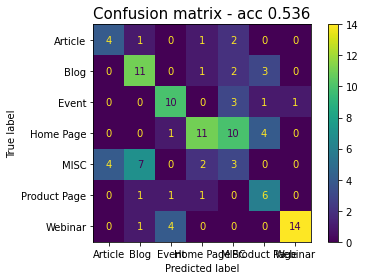

In [ ]:
# Class weight balanced
print_confusion_matrix(y_vals, y_preds, with_report=False)

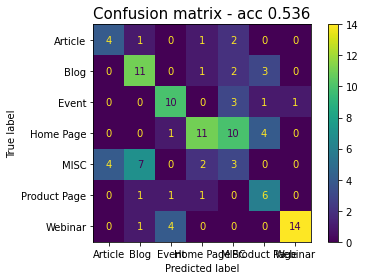

In [ ]:
print_confusion_matrix(y_vals, y_preds, with_report=False)

# 3. BERT approach (Ashwin N)

## Encoding labels

In [ ]:
! pwd

/content/drive/MyDrive/url_classification


In [ ]:
df_text.head(3)

text  label  url  \
0  2020 User Summit. 2020 User Summit  *UPDATE - ...      2  NaN   
1  Write For Us. Want to Write for Us?  Digital L...      5  NaN   
2  Write for Us. Yes, you. We‚Äôre always looking f...      5  NaN   

                                        cleaned_text  \
0  2020 User Summit 2020 User Summit UPDATE March...   
1  Write For Us Want Write Us Digital Lamp one fa...   
2  Write Us Yes Were always looking new authors I...   

                                     lemmatized_text  \
0  2020 User Summit . 2020 User Summit   * update...   
1  write for we . want to write for we ?   Digita...   
2  write for we . yes , you . we ‚Äôre always look ...   

                             lemmatized_cleaned_text  \
0  2020 User Summit 2020 User Summit update March...   
1  write want write Digital Lamp one fast grow te...   
2  write yes always look new author get idea chal...   

                                            w2v_text  
0  2020 user summit . 2020 user summit   * update...  
1  write for us . want to write for us ?   digita...  
2  write for us . yes , you . we ‚Äôre always looki...

In [ ]:
df_text[['w2v_text', 'text', 'label']]

w2v_text  \
0    2020 user summit . 2020 user summit   * update...   
1    write for us . want to write for us ?   digita...   
2    write for us . yes , you . we ‚Äôre always looki...   
3    faqs for some new features available in the be...   
4    the best nootropic stack to replace adderall &...   
..                                                 ...   
959  veeva systems korea aims to become cloud sw le...   
960  digital transformation of clinical research ac...   
961  veeva systems is a top stock for 2022 . veeva ...   
962  medidata ‚Äôs acorn ai solution raises clinical ...   
963  accenture ‚Äôs federal arm hires new applied int...   

                                                  text  label  
0    2020 User Summit. 2020 User Summit  *UPDATE - ...      2  
1    Write For Us. Want to Write for Us?  Digital L...      5  
2    Write for Us. Yes, you. We‚Äôre always looking f...      5  
3    FAQs for some new features available in the Be...      1  
4    The Best Nootropic Stack to Replace Adderall &...      0  
..                                                 ...    ...  
959  Veeva Systems Korea aims to become cloud SW le...      0  
960  Digital transformation of clinical research ac...      0  
961  Veeva Systems is a Top Stock for 2022. Veeva S...      0  
962  Medidata‚Äôs Acorn AI solution raises clinical t...      0  
963  Accenture‚Äôs federal arm hires new applied inte...      0  

[857 rows x 3 columns]

In [ ]:
df_text[TARGET] = df_text[TARGET].replace(labels_encoded)

In [ ]:
df_text[TARGET].value_counts()

1    198
2    174
3    172
4    150
0     86
5     77
Name: label, dtype: int64

## Working with fixed validation data

### Preprocessing

In [43]:
df_text

text  label  \
0    2020 User Summit. 2020 User Summit  *UPDATE - ...      2   
1    Write For Us. Want to Write for Us?  Digital L...      5   
2    Write for Us. Yes, you. We‚Äôre always looking f...      5   
3    FAQs for some new features available in the Be...      1   
4    The Best Nootropic Stack to Replace Adderall &...      0   
..                                                 ...    ...   
959  Veeva Systems Korea aims to become cloud SW le...      0   
960  Digital transformation of clinical research ac...      0   
961  Veeva Systems is a Top Stock for 2022. Veeva S...      0   
962  Medidata‚Äôs Acorn AI solution raises clinical t...      0   
963  Accenture‚Äôs federal arm hires new applied inte...      0   

                                                   url  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
959  http://www.koreabiomed.com/news/articleView.ht...   
960  http://www.outsourcing-pharma.com/Article/2021...   
961         http://www.entrepreneur.com/article/400416   
962  http://www.koreabiomed.com/news/articleView.ht...   
963  http://washingtontechnology.com/companies/2022...   

                                          cleaned_text  \
0    2020 User Summit 2020 User Summit UPDATE March...   
1    Write For Us Want Write Us Digital Lamp one fa...   
2    Write Us Yes Were always looking new authors I...   
3    FAQs new features available Beta Wayback Machi...   
4    The Best Nootropic Stack Replace Adderall Rita...   
..                                                 ...   
959  Veeva Systems Korea aims become cloud SW leade...   
960  Digital transformation clinical research accel...   
961  Veeva Systems Top Stock 2022 Veeva Systems VEE...   
962  Medidatas Acorn AI solution raises clinical tr...   
963  Accentures federal arm hires new applied intel...   

                                       lemmatized_text  \
0    2020 User Summit . 2020 User Summit   * update...   
1    write for we . want to write for we ?   Digita...   
2    write for we . yes , you . we ‚Äôre always look ...   
3    FAQs for some new feature available in the Bet...   
4    the Best Nootropic Stack to replace Adderall &...   
..                                                 ...   
959  Veeva Systems Korea aim to become cloud SW lea...   
960  digital transformation of clinical research ac...   
961  Veeva Systems be a Top Stock for 2022 . Veeva ...   
962  Medidata ‚Äôs Acorn AI solution raise clinical t...   
963  Accenture ‚Äôs federal arm hire new apply intell...   

                               lemmatized_cleaned_text  \
0    2020 User Summit 2020 User Summit update March...   
1    write want write Digital Lamp one fast grow te...   
2    write yes always look new author get idea chal...   
3    FAQs new feature available Beta Wayback Machin...   
4    Best Nootropic Stack replace Adderall Ritalin ...   
..                                                 ...   
959  Veeva Systems Korea aim become cloud SW leader...   
960  digital transformation clinical research accel...   
961  Veeva Systems Top Stock 2022 Veeva Systems VEE...   
962  Medidata Acorn AI solution raise clinical tria...   
963  Accenture federal arm hire new apply intellige...   

                                              w2v_text  
0    2020 user summit . 2020 user summit   * update...  
1    write for us . want to write for us ?   digita...  
2    write for us . yes , you . we ‚Äôre always looki...  
3    faqs for some new features available in the be...  
4    the best nootropic stack to replace adderall &...  
..                                                 ...  
959  veeva systems korea aims to become cloud sw le...  
960  digita

In [44]:
# df_positive = df_text[df_text[TARGET] != 5]
# df_negative = df_text[df_text[TARGET] == 5]

# Cell 9
test_size = 0.2
val_size = 0.1
random_state = 0

# Important cell # 9
column_used = 'text'

# X = df_positive[[column_used]]
# y = df_positive[TARGET]
X = df_text[[column_used]]
y = df_text[TARGET]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                    test_size=test_size,
                                                    stratify=y, 
                                                    random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                    test_size=1/((1-test_size)/val_size),
                                                    stratify=y_train_val, 
                                                    random_state=random_state)

# X_misc = df_negative[[column_used]]
# y_misc = df_negative[TARGET]
# X_test = pd.concat([X_test, X_misc])
# y_test = pd.concat([y_test, y_misc])

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((599, 1), (86, 1), (172, 1), (599,), (86,), (172,))

In [45]:
y_train.value_counts()

1    138
2    122
3    120
4    105
0     60
5     54
Name: label, dtype: int64

In [46]:
y_val.value_counts()

1    20
3    17
2    17
4    15
0     9
5     8
Name: label, dtype: int64

In [47]:
y_test.value_counts()

1    40
3    35
2    35
4    30
0    17
5    15
Name: label, dtype: int64

In [48]:
X_train

text
103  5 Content Strategies for Boring Brands. ‚ÄúIf pe...
486  Advancing digital-first delivery of care with ...
785  Mayo Clinic, Verily to Build Advanced Clinical...
343  SHRMNxTAPAC21 ‚Äì SHRMI ‚Äì Conferences. SHRM NxT ...
692  IQVIA Virtual Trial Solutions Used in More tha...
..                                                 ...
955  Top Cannabis VC Fund Poseidon Invests In Quali...
65   10 Helpful Tips for Choosing and Using Fonts. ...
168  Write for us. Are you a digital marketer, want...
436  Accenture and SHSMD. Healthcare organizations ...
221  Submit A Guest Post ‚Äì Guidelines (Write for Us...

[599 rows x 1 columns]

In [49]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

dataset = DatasetDict(
    {
    'train': Dataset.from_dict(
        {'text': X_train[column_used],
         'label': y_train,
         }
         ),
    'validation': Dataset.from_dict(
        {'text': X_val[column_used],
         'label': y_val,
         }
         ),
    'test': Dataset.from_dict(
        {'text': X_test[column_used],
         'label': y_test,
         }
         ),
    }
    )

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 599
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 86
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 172
    })
})

In [50]:
train_ds = dataset['train']

In [51]:
print(train_ds[:5])

{'text': ['5 Content Strategies for Boring Brands. ‚ÄúIf people aren‚Äôt talking about you, they‚Äôre not talking about you for a reason. And the reason isn‚Äôt that they dislike you. They‚Äôre not talking about you because you‚Äôre boring.‚Äù ~ Seth Godin  The formidable challenge for marketers of boring brands is that you have to present content that is remarkable and interesting even when your product‚Äîon the face of it‚Äîis not.  So, how should you get people to take interest in a boring brand?  The key is in distinctive presentation. Every brand has a unique story about its origin, its people and its experience. The solution is to find an authentic theme, apply creative imagination and tell your story in a way that will attract and retain people‚Äôs attention. What was widely perceived to be boring could become inspiring or at least interesting to a group of people.  Let‚Äôs face it. Boring products solve legitimate problems too. QuickBooks, toilet paper and dentures fulfill a ne

In [52]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
# model_ckpt = 'bert-base-uncased' # Node: 'tf_bert_for_sequence_classification/bert/encoder/layer_._8/intermediate/Gelu/mul_1' failed to allocate memory
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [53]:
text = "Tokenizing text is a core task of NLP 2021. See you on 31/12/2022."
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 25682, 1012, 2156, 2017, 2006, 2861, 1013, 2260, 1013, 16798, 2475, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [54]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '2021', '.', 'see', 'you', 'on', '31', '/', '12', '/', '202', '##2', '.', '[SEP]']


In [55]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp 2021. see you on 31 / 12 / 2022. [SEP]


In [56]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [57]:
print(tokenize(dataset["train"][:2])) 

{'input_ids': [[101, 1019, 4180, 9942, 2005, 11771, 9639, 1012, 1523, 2065, 2111, 4995, 1521, 1056, 3331, 2055, 2017, 1010, 2027, 1521, 2128, 2025, 3331, 2055, 2017, 2005, 1037, 3114, 1012, 1998, 1996, 3114, 3475, 1521, 1056, 2008, 2027, 18959, 2017, 1012, 2027, 1521, 2128, 2025, 3331, 2055, 2017, 2138, 2017, 1521, 2128, 11771, 1012, 1524, 1066, 6662, 2643, 2378, 1996, 18085, 4119, 2005, 3006, 2545, 1997, 11771, 9639, 2003, 2008, 2017, 2031, 2000, 2556, 4180, 2008, 2003, 9487, 1998, 5875, 2130, 2043, 2115, 4031, 1517, 2006, 1996, 2227, 1997, 2009, 1517, 2003, 2025, 1012, 2061, 1010, 2129, 2323, 2017, 2131, 2111, 2000, 2202, 3037, 1999, 1037, 11771, 4435, 1029, 1996, 3145, 2003, 1999, 8200, 8312, 1012, 2296, 4435, 2038, 1037, 4310, 2466, 2055, 2049, 4761, 1010, 2049, 2111, 1998, 2049, 3325, 1012, 1996, 5576, 2003, 2000, 2424, 2019, 14469, 4323, 1010, 6611, 5541, 9647, 1998, 2425, 2115, 2466, 1999, 1037, 2126, 2008, 2097, 9958, 1998, 9279, 2111, 1521, 1055, 3086, 1012, 2054, 2001, 4235, 

In [58]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [59]:
dataset_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 599
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 86
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 172
    })
})

In [60]:
from transformers import TFAutoModel 
tf_model = TFAutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [61]:
text = "this is a test"
inputs = tokenizer(text, return_tensors='tf')
inputs

{'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 2003, 1037, 3231,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [62]:
outputs = tf_model(inputs)
outputs

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.156513  , -0.18619666,  0.05277651, ..., -0.11881146,
          0.06620602,  0.5470156 ],
        [-0.3575139 , -0.6483559 , -0.0617902 , ..., -0.3040195 ,
          0.35076872,  0.5220684 ],
        [-0.27718496, -0.4459445 ,  0.1818425 , ..., -0.09477941,
         -0.00757464,  0.9958281 ],
        [-0.28408563, -0.3916768 ,  0.37525558, ..., -0.21505757,
         -0.11725189,  1.0526482 ],
        [ 0.2660821 , -0.509364  , -0.31801355, ..., -0.42029813,
          0.01444179, -0.21489467],
        [ 0.9440609 ,  0.01117263, -0.47139442, ...,  0.14394675,
         -0.7287836 , -0.16194907]]], dtype=float32)>, hidden_states=None, attentions=None)

In [63]:
outputs.last_hidden_state.shape

TensorShape([1, 6, 768])

In [64]:
dataset_encoded.reset_format()

def extract_hidden_states(batch):
    # First convert text to tokens
    inputs = tokenizer(
        batch["text"], 
        padding=True, 
        truncation=True, 
        return_tensors='tf',
        )
    # Extract last hidden states
    outputs = tf_model(inputs)
     # Return vector for [CLS] token
    return {"hidden_state": outputs.last_hidden_state[:,0].numpy()}

In [65]:
dataset_hidden = dataset_encoded.map(extract_hidden_states, batched=True, batch_size=16)
dataset_hidden

  0%|          | 0/38 [00:00<?, ?ba/s]

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/11 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 599
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 86
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 172
    })
})

In [66]:
import numpy as np
X_train_ = np.array(dataset_hidden["train"]["hidden_state"])
X_valid_ = np.array(dataset_hidden["validation"]["hidden_state"])
y_train_ = np.array(dataset_hidden["train"]["label"])
y_valid_ = np.array(dataset_hidden["validation"]["label"])
X_train_.shape, X_valid_.shape, y_train_.shape, y_valid_.shape

((599, 768), (86, 768), (599,), (86,))

In [67]:
X_test_ = np.array(dataset_hidden["test"]["hidden_state"])
y_test_ = np.array(dataset_hidden["test"]["label"])
X_test_.shape, y_test.shape

((172, 768), (172,))

In [68]:
X_train_

array([[-0.04961229,  0.0384727 , -0.07118477, ..., -0.1867758 ,
         0.39600113,  0.15715419],
       [-0.28209955, -0.09229711,  0.22186601, ..., -0.1048656 ,
         0.23100126,  0.26173201],
       [-0.41354528, -0.19282307, -0.10362765, ..., -0.11213232,
         0.46551567,  0.19092804],
       ...,
       [ 0.0584471 ,  0.02112034, -0.01251618, ..., -0.1512482 ,
         0.47226125,  0.2203968 ],
       [-0.13177465, -0.16667029, -0.00417405, ..., -0.24048589,
         0.31105435,  0.07123714],
       [-0.14194459, -0.03721767,  0.15154931, ..., -0.08806437,
         0.46088189,  0.52053249]])

In [69]:
X_train_valid_ = np.concatenate([X_train_, X_valid_])
X_train_.shape, X_valid_.shape, X_train_valid_.shape

((599, 768), (86, 768), (685, 768))

In [70]:
y_train_valid_ = np.concatenate([y_train_, y_valid_])
y_train_.shape, y_valid_.shape, y_train_valid_.shape

((599,), (86,), (685,))

In [71]:
# X_valid_test_ = np.concatenate([X_valid_, X_test_])
# X_valid_.shape, X_test_.shape, X_valid_test_.shape

In [72]:
# y_valid_test_ = np.concatenate([y_valid_, y_test_])
# y_valid_.shape, y_test_.shape, y_valid_test_.shape

### Modeling - machine learning approach:

In [73]:
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train_valid_, y_train_valid_)
lr_clf.score(X_test_, y_test_)

0.8023255813953488

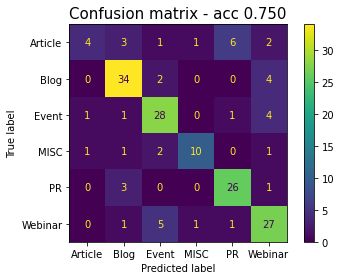


              precision    recall  f1-score   support

     Article       0.67      0.24      0.35        17
        Blog       0.79      0.85      0.82        40
       Event       0.74      0.80      0.77        35
        MISC       0.83      0.67      0.74        15
          PR       0.76      0.87      0.81        30
     Webinar       0.69      0.77      0.73        35

    accuracy                           0.75       172
   macro avg       0.75      0.70      0.70       172
weighted avg       0.75      0.75      0.74       172



In [74]:
rf_clf = fit_model(RandomForestClassifier(max_depth=10,
                                            n_estimators=50,
                                            random_state=0,
                                          ),
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(rf_clf, X_test_)
y_probs = rf_clf.predict_proba(X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

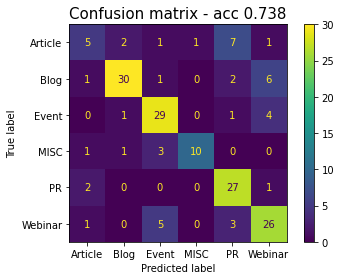


              precision    recall  f1-score   support

     Article       0.50      0.29      0.37        17
        Blog       0.88      0.75      0.81        40
       Event       0.74      0.83      0.78        35
        MISC       0.91      0.67      0.77        15
          PR       0.68      0.90      0.77        30
     Webinar       0.68      0.74      0.71        35

    accuracy                           0.74       172
   macro avg       0.73      0.70      0.70       172
weighted avg       0.74      0.74      0.73       172



In [76]:
svc_clf = fit_model(SVC(C=1, 
                    class_weight='balanced'
                    ),
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(svc_clf, X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

In [77]:
X_train_.shape

(599, 768)

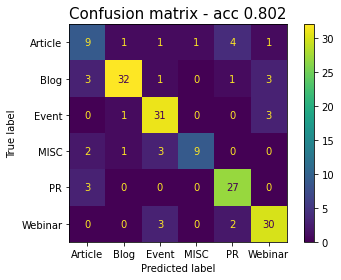


              precision    recall  f1-score   support

     Article       0.53      0.53      0.53        17
        Blog       0.91      0.80      0.85        40
       Event       0.79      0.89      0.84        35
        MISC       0.90      0.60      0.72        15
          PR       0.79      0.90      0.84        30
     Webinar       0.81      0.86      0.83        35

    accuracy                           0.80       172
   macro avg       0.79      0.76      0.77       172
weighted avg       0.81      0.80      0.80       172



In [78]:
lr_clf = fit_model(LogisticRegression(max_iter=3000, 
                                   class_weight='balanced', 
                                   ), 
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(lr_clf, X_test_)
y_probs = lr_clf.predict_proba(X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

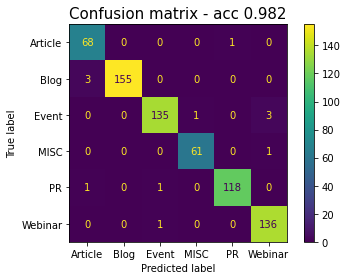


              precision    recall  f1-score   support

     Article       0.94      0.99      0.96        69
        Blog       1.00      0.98      0.99       158
       Event       0.99      0.97      0.98       139
        MISC       0.98      0.98      0.98        62
          PR       0.99      0.98      0.99       120
     Webinar       0.97      0.99      0.98       137

    accuracy                           0.98       685
   macro avg       0.98      0.98      0.98       685
weighted avg       0.98      0.98      0.98       685



In [79]:
# Check if it's overfitting
y_pred_train = predict(lr_clf, X_train_valid_)
print_confusion_matrix(y_train_valid_, y_pred_train, with_report=True)

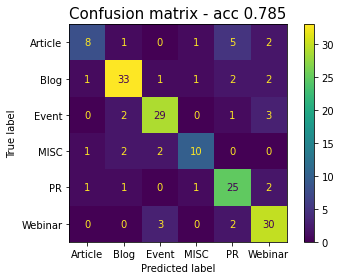


              precision    recall  f1-score   support

     Article       0.73      0.47      0.57        17
        Blog       0.85      0.82      0.84        40
       Event       0.83      0.83      0.83        35
        MISC       0.77      0.67      0.71        15
          PR       0.71      0.83      0.77        30
     Webinar       0.77      0.86      0.81        35

    accuracy                           0.78       172
   macro avg       0.78      0.75      0.75       172
weighted avg       0.79      0.78      0.78       172



In [80]:
lr_clf = fit_model(LogisticRegression(
    max_iter=3000, 
    class_weight='balanced',
    solver='liblinear', # default: 'lbfgs' 
    penalty='l1', # default: 'l2'
    ), 
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(lr_clf, X_test_)
y_probs = lr_clf.predict_proba(X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

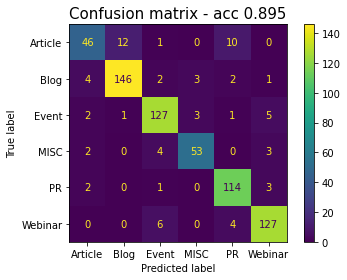


              precision    recall  f1-score   support

     Article       0.82      0.67      0.74        69
        Blog       0.92      0.92      0.92       158
       Event       0.90      0.91      0.91       139
        MISC       0.90      0.85      0.88        62
          PR       0.87      0.95      0.91       120
     Webinar       0.91      0.93      0.92       137

    accuracy                           0.89       685
   macro avg       0.89      0.87      0.88       685
weighted avg       0.89      0.89      0.89       685



In [81]:
# Check if it's overfitting
y_pred_train = predict(lr_clf, X_train_valid_)
print_confusion_matrix(y_train_valid_, y_pred_train, with_report=True)

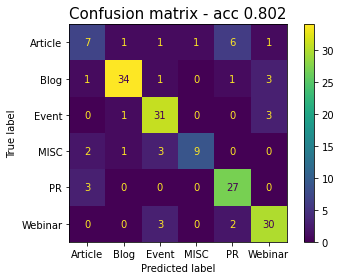


              precision    recall  f1-score   support

     Article       0.54      0.41      0.47        17
        Blog       0.92      0.85      0.88        40
       Event       0.79      0.89      0.84        35
        MISC       0.90      0.60      0.72        15
          PR       0.75      0.90      0.82        30
     Webinar       0.81      0.86      0.83        35

    accuracy                           0.80       172
   macro avg       0.79      0.75      0.76       172
weighted avg       0.80      0.80      0.80       172



In [82]:
lr_clf = fit_model(LogisticRegression(max_iter=3000, 
                                  #  class_weight='balanced', 
                                   ), 
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(lr_clf, X_test_)
y_probs = lr_clf.predict_proba(X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

In [83]:
# lr_clf = fit_model(LogisticRegression(
#     max_iter=3000, 
#     class_weight='balanced',
#     solver='saga', # default: 'lbfgs' 
#     penalty='elasticnet', # default: 'l2',
#     l1_ratio=0.9, # only relevant when penalty='elasticnet'
#     ), 
#                 X_train_, 
#                 y_train_)

# y_pred = predict(lr_clf, X_valid_test_)
# y_probs = lr_clf.predict_proba(X_valid_test_)

# print_confusion_matrix(y_valid_test_, y_pred, with_report=True)

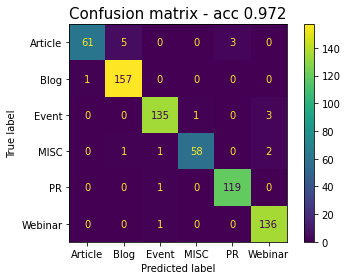


              precision    recall  f1-score   support

     Article       0.98      0.88      0.93        69
        Blog       0.96      0.99      0.98       158
       Event       0.98      0.97      0.97       139
        MISC       0.98      0.94      0.96        62
          PR       0.98      0.99      0.98       120
     Webinar       0.96      0.99      0.98       137

    accuracy                           0.97       685
   macro avg       0.97      0.96      0.97       685
weighted avg       0.97      0.97      0.97       685



In [84]:
# Check if it's overfitting
y_pred_train = predict(lr_clf, X_train_valid_)
print_confusion_matrix(y_train_valid_, y_pred_train, with_report=True)

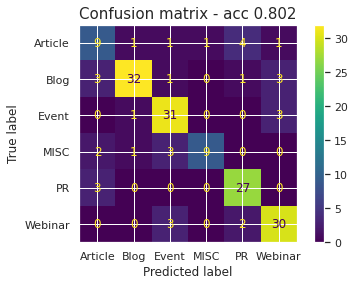


              precision    recall  f1-score   support

     Article       0.53      0.53      0.53        17
        Blog       0.91      0.80      0.85        40
       Event       0.79      0.89      0.84        35
        MISC       0.90      0.60      0.72        15
          PR       0.79      0.90      0.84        30
     Webinar       0.81      0.86      0.83        35

    accuracy                           0.80       172
   macro avg       0.79      0.76      0.77       172
weighted avg       0.81      0.80      0.80       172



In [175]:
lr_clf = fit_model(LogisticRegression(max_iter=3000, 
                                   class_weight='balanced', 
                                   ), 
                X_train_valid_, 
                y_train_valid_)

y_pred = predict(lr_clf, X_test_)
y_probs = lr_clf.predict_proba(X_test_)

print_confusion_matrix(y_test_, y_pred, with_report=True)

In [157]:
pickle.dump(lr_clf, open('/content/drive/MyDrive/url_classification/Models/distilbert_lr_clf', 'wb'))

In [158]:
# lr_clf = pickle.load(open('/content/drive/MyDrive/url_classification/Models/distilbert_lr_clf', 'rb'))

In [86]:
df_text

text  label  \
0    2020 User Summit. 2020 User Summit  *UPDATE - ...      2   
1    Write For Us. Want to Write for Us?  Digital L...      5   
2    Write for Us. Yes, you. We‚Äôre always looking f...      5   
3    FAQs for some new features available in the Be...      1   
4    The Best Nootropic Stack to Replace Adderall &...      0   
..                                                 ...    ...   
959  Veeva Systems Korea aims to become cloud SW le...      0   
960  Digital transformation of clinical research ac...      0   
961  Veeva Systems is a Top Stock for 2022. Veeva S...      0   
962  Medidata‚Äôs Acorn AI solution raises clinical t...      0   
963  Accenture‚Äôs federal arm hires new applied inte...      0   

                                                   url  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
959  http://www.koreabiomed.com/news/articleView.ht...   
960  http://www.outsourcing-pharma.com/Article/2021...   
961         http://www.entrepreneur.com/article/400416   
962  http://www.koreabiomed.com/news/articleView.ht...   
963  http://washingtontechnology.com/companies/2022...   

                                          cleaned_text  \
0    2020 User Summit 2020 User Summit UPDATE March...   
1    Write For Us Want Write Us Digital Lamp one fa...   
2    Write Us Yes Were always looking new authors I...   
3    FAQs new features available Beta Wayback Machi...   
4    The Best Nootropic Stack Replace Adderall Rita...   
..                                                 ...   
959  Veeva Systems Korea aims become cloud SW leade...   
960  Digital transformation clinical research accel...   
961  Veeva Systems Top Stock 2022 Veeva Systems VEE...   
962  Medidatas Acorn AI solution raises clinical tr...   
963  Accentures federal arm hires new applied intel...   

                                       lemmatized_text  \
0    2020 User Summit . 2020 User Summit   * update...   
1    write for we . want to write for we ?   Digita...   
2    write for we . yes , you . we ‚Äôre always look ...   
3    FAQs for some new feature available in the Bet...   
4    the Best Nootropic Stack to replace Adderall &...   
..                                                 ...   
959  Veeva Systems Korea aim to become cloud SW lea...   
960  digital transformation of clinical research ac...   
961  Veeva Systems be a Top Stock for 2022 . Veeva ...   
962  Medidata ‚Äôs Acorn AI solution raise clinical t...   
963  Accenture ‚Äôs federal arm hire new apply intell...   

                               lemmatized_cleaned_text  \
0    2020 User Summit 2020 User Summit update March...   
1    write want write Digital Lamp one fast grow te...   
2    write yes always look new author get idea chal...   
3    FAQs new feature available Beta Wayback Machin...   
4    Best Nootropic Stack replace Adderall Ritalin ...   
..                                                 ...   
959  Veeva Systems Korea aim become cloud SW leader...   
960  digital transformation clinical research accel...   
961  Veeva Systems Top Stock 2022 Veeva Systems VEE...   
962  Medidata Acorn AI solution raise clinical tria...   
963  Accenture federal arm hire new apply intellige...   

                                              w2v_text  
0    2020 user summit . 2020 user summit   * update...  
1    write for us . want to write for us ?   digita...  
2    write for us . yes , you . we ‚Äôre always looki...  
3    faqs for some new features available in the be...  
4    the best nootropic stack to replace adderall &...  
..                                                 ...  
959  veeva systems korea aims to become cloud sw le...  
960  digita

In [87]:
labels_encoded

{'Article': 0, 'Blog': 1, 'Event': 2, 'Webinar': 3, 'PR': 4, 'MISC': 5}

In [93]:
mask = y_pred != y_test_

In [113]:
X_test = pd.DataFrame(X_test, columns=['text']) # transform into DataFrame

misclassified_df = create_misclassified_df(X_test=X_test, y_test=y_test, y_pred=y_pred)
assert (misclassified_df['y_true'] != misclassified_df['y_pred']).all()
misclassified_df.head()

text   y_true   y_pred
932  IQVIA (IQV) Buys Remaining Q2 Solutions Stake,...       PR  Article
713  CVS inks a deal with Medable to enroll more pa...  Article  Webinar
680  California ends Verily COVID-19 testing partne...  Article       PR
84   How to Use Hashtags: How Many, Best Ones, and ...     Blog  Article
791  Overview of EMA's latest IDMP Updates in 2022....     Blog  Webinar

In [ ]:
# X_valid_test = np.concatenate([X_val, X_test]) # concatenate
# X_valid_test = pd.DataFrame(X_valid_test, columns=['text']) # transform into DataFrame

# misclassified_df = create_misclassified_df(X_test=X_valid_test, y_test=y_valid_test_, y_pred=y_pred)
# assert (misclassified_df['y_true'] != misclassified_df['y_pred']).all()
# misclassified_df

In [121]:
misclassified_df.shape

(34, 3)

In [122]:
df_merged = pd.merge(misclassified_df, df_text[['url', 'text']], on='text')
df_merged.index = misclassified_df.index
df_merged

text   y_true   y_pred  \
932  IQVIA (IQV) Buys Remaining Q2 Solutions Stake,...       PR  Article   
713  CVS inks a deal with Medable to enroll more pa...  Article  Webinar   
680  California ends Verily COVID-19 testing partne...  Article       PR   
84   How to Use Hashtags: How Many, Best Ones, and ...     Blog  Article   
791  Overview of EMA's latest IDMP Updates in 2022....     Blog  Webinar   
880  The Power of Patient-Centricity in Rare Diseas...     Blog  Webinar   
904  Introducing a Medical Perspective on Clinical ...     Blog       PR   
524  New Data on the Future of CNS Clinical Trials....  Webinar    Event   
207  What Do Millennials Really Want at Work? The S...  Article     MISC   
222  Fully Managed Magento Hosting ‚Äî JetRails. Full...     MISC    Event   
619  Fierce Healthcare Webinar: Outlook for Telehea...  Webinar       PR   
951  IQVIA (IQV) Announces Launch of Clinical Data ...       PR  Article   
842  CTMS: Key to Unlocking Clinical Data Power. Co...     Blog  Webinar   
371  Women Leaders in Emerging Tech Discussion co-h...    Event  Webinar   
338  4th Virtual Clinical Trials. Switching to virt...    Event  Webinar   
921  IQVIA already hiring for dozens of roles at ne...  Article       PR   
822  RNSA 2021: BrightInsight‚Äôs post-conference per...     Blog    Event   
309  Outsourcing in Clinical Trials & Clinical Tria...    Event     Blog   
329  2022 HBS Health Care Conference. The New Where...     MISC    Event   
778  Verily and Janssen to collaborate on home-base...  Article       PR   
626  HIMSS Learning Center. Online Learning  We are...     MISC    Event   
102  Great Content Starts with Great Questions for ...  Article     Blog   
741  ObvioHealth Shares News Regarding Diversity of...       PR  Article   
228  ObvioHealth. MAGI Clinical Research Conference...  Webinar    Event   
112  Blogging 101: The ABC's of starting a blog fro...     MISC     Blog   
960  Digital transformation of clinical research ac...  Article       PR   
39   AWS Privacy. Privacy Notice  To see prior vers...     MISC  Article   
555  Global Strategies for Accelerating Time to Mar...  Webinar       PR   
456  Ross McEwan CBE, CEO of National Australia Ban...  Webinar    Event   
61   Artificial Intelligence Is Here - People Just ...     Blog  Article   
3    FAQs for some new features available in the Be...     Blog  Article   
206  How to Do Walking Meetings Right. New!  HBR Le...  Article    Event   
121  font-display | CSS-Tricks. The font-display pr...     MISC  Article   
299  In Conduct of Decentralized Trials. In today‚Äôs...    Event  Webinar   

                                                   url  
932  http://www.zacks.com/stock/news/1348735/iqvia-...  
713  http://www.statnews.com/2022/02/08/cvs-medable...  
680  http://www.beckershospitalreview.com/healthcar...  
84                                                 NaN  
791  http://www.calyx.ai/journal/overview-ema-lates...  
880  http://medrio.com/resource/the-power-of-patien...  
904  http://www.calyx.ai/journal/a-medical-perspect...  
524  http://science37.com/Company/Events/webinar-ne...  
207                                                NaN  
222                                                NaN  
619  http://pages.questexinfo.com/glookowbnr1208202...  
951  http://www.zacks.com/stock/news/1754370/iqvia-...  
842  http://www.calyx.ai/journal/ctms-unlocking-cli...  
371  http://www.eventbrite.com/e/women-leaders-in-e...  
338  http://dgevents.com/event/4th-virtual-clinical...  
921  http://www.wraltechwire.com/2021/10/08/iqvia-a...  
822  http://brightinsight.com/blog/rnsa-2021-bright...  
309      http://www.arena-international.com/octnordics  
329  http://www.eventbrite.com/e/2022-hbs-health-ca...  
778  http://www.pmlive.com/pharma_news/verily_and_j...  
626  http://www.himsslearn.org/building-hospital-ho...  
102                                                NaN  
741  http://marketersmedia.com/obviohealth-shares-n...  
228   http://ww

In [123]:
df_merged.shape

(34, 4)

In [124]:
df_confidences = df_merged[['y_true', 'y_pred']].applymap(lambda x: labels_encoded[x])
df_confidences.head()

y_true  y_pred
932       4       0
713       0       3
680       0       4
84        1       0
791       1       3

In [125]:
df_confidences.shape

(34, 2)

In [129]:
mask = y_pred != y_test

In [130]:
# mask = y_pred != y_valid_test_ and y_valid_test_ != 5

In [131]:
y_probs[mask][:3]

array([[4.78920389e-01, 2.02651315e-01, 9.93016026e-02, 2.53982528e-02,
        1.05969636e-02, 1.83131478e-01],
       [4.54252856e-03, 9.52887533e-04, 1.32076621e-02, 6.58280716e-01,
        3.38966395e-04, 3.22677239e-01],
       [2.24608589e-01, 3.76523970e-03, 1.80739765e-03, 1.77883163e-03,
        7.60422420e-01, 7.61752234e-03]])

In [132]:
df_confidences['y_true']

932    4
713    0
680    0
84     1
791    1
880    1
904    1
524    3
207    0
222    5
619    3
951    4
842    1
371    2
338    2
921    0
822    1
309    2
329    5
778    0
626    5
102    0
741    4
228    3
112    5
960    0
39     5
555    3
456    3
61     1
3      1
206    0
121    5
299    2
Name: y_true, dtype: int64

In [133]:
# num_misc = (df_confidences['y_true'] == 5).sum()
# num_misc

In [134]:
confidence_pred = y_probs[mask, df_confidences['y_pred']]
confidence_pred

array([0.47892039, 0.65828072, 0.76042242, 0.52470149, 0.5756369 ,
       0.45995986, 0.44297741, 0.52138024, 0.83890112, 0.35701317,
       0.53240462, 0.44389242, 0.74164669, 0.74827989, 0.75120292,
       0.58843639, 0.94519173, 0.576738  , 0.63902982, 0.45591526,
       0.74999727, 0.815721  , 0.61629456, 0.80713943, 0.6981093 ,
       0.47132147, 0.45950802, 0.48912313, 0.65825767, 0.58431903,
       0.55716535, 0.64218227, 0.72546744, 0.52253999])

In [135]:
confidence_true = y_probs[mask, df_confidences['y_true']]
confidence_true

array([1.05969636e-02, 4.54252856e-03, 2.24608589e-01, 2.14161798e-01,
       3.96017927e-02, 3.43550453e-01, 1.45051089e-01, 3.27122609e-01,
       8.46974483e-03, 2.97857886e-01, 2.65377519e-01, 2.18466589e-02,
       2.53384377e-03, 1.50185148e-01, 1.87167211e-01, 4.07500013e-01,
       3.71312290e-02, 4.56519034e-02, 3.71999079e-02, 4.54945043e-01,
       5.91594853e-02, 1.79028439e-01, 2.28620920e-01, 1.09064000e-01,
       2.79600473e-01, 1.49645210e-01, 3.55256957e-01, 1.67529614e-01,
       1.83067657e-01, 3.95572507e-01, 4.18580840e-01, 2.07965878e-04,
       2.51050828e-01, 3.69727077e-01])

In [136]:
# confidence_true = y_probs[:-num_misc][mask[:-num_misc], df_confidences['y_true'][:-num_misc]]
# confidence_true = np.concatenate((confidence_true, np.zeros(num_misc)), axis=0)
# confidence_true

In [137]:
df_merged['conf_true'] = confidence_true.round(2)
df_merged['conf_pred'] = confidence_pred.round(2)

In [138]:
df_merged.tail()

text   y_true   y_pred  \
61   Artificial Intelligence Is Here - People Just ...     Blog  Article   
3    FAQs for some new features available in the Be...     Blog  Article   
206  How to Do Walking Meetings Right. New!  HBR Le...  Article    Event   
121  font-display | CSS-Tricks. The font-display pr...     MISC  Article   
299  In Conduct of Decentralized Trials. In today‚Äôs...    Event  Webinar   

                                                   url  conf_true  conf_pred  
61                                                 NaN       0.40       0.58  
3                                                  NaN       0.42       0.56  
206                                                NaN       0.00       0.64  
121                                                NaN       0.25       0.73  
299  http://app.swapcard.com/event/scdm-2021-annual...       0.37       0.52

In [139]:
df_merged = df_merged[['url', 'text', 'y_true', 'conf_true', 'y_pred', 'conf_pred']]

In [140]:
df_merged.shape

(34, 6)

In [171]:
df = df_merged.iloc[13:, :]

In [172]:
df.drop('text', axis=1).head(3)

url   y_true  conf_true  \
371  http://www.eventbrite.com/e/women-leaders-in-e...    Event       0.15   
338  http://dgevents.com/event/4th-virtual-clinical...    Event       0.19   
921  http://www.wraltechwire.com/2021/10/08/iqvia-a...  Article       0.41   

      y_pred  conf_pred  
371  Webinar       0.75  
338  Webinar       0.75  
921       PR       0.59

In [142]:
save_variable(df_merged, 'df_merged')

In [143]:
misclassified_urls = df_merged['url'].tolist()
misclassified_urls

['http://www.zacks.com/stock/news/1348735/iqvia-iqv-buys-remaining-q2-solutions-stake-ups-eps-view?cid=CS-ZC-FT-analyst_blog%7Ccompany_news_-_corporate_actions-1348735',
 'http://www.statnews.com/2022/02/08/cvs-medable-clinical-trials/',
 'http://www.beckershospitalreview.com/healthcare-information-technology/california-ends-verily-covid-19-testing-partnership.html',
 nan,
 'http://www.calyx.ai/journal/overview-ema-latest-idmp-updates/',
 'http://medrio.com/resource/the-power-of-patient-centricity-in-rare-disease-studies/',
 'http://www.calyx.ai/journal/a-medical-perspective-on-clinical-trial-technology/',
 'http://science37.com/Company/Events/webinar-new-data-future-cns-clinical-trials',
 nan,
 nan,
 'http://pages.questexinfo.com/glookowbnr12082021/?pk=Glooko',
 'http://www.zacks.com/stock/news/1754370/iqvia-iqv-announces-launch-of-clinical-data-analytics-suite?cid=CS-ZC-FT-analyst_blog%7Ccompany_news_-_corporate_actions-1754370',
 'http://www.calyx.ai/journal/ctms-unlocking-clinical-

In [144]:
wrong_conf_pred = np.max(y_probs[mask], axis=1)
wrong_conf_pred[:3]

array([0.47892039, 0.65828072, 0.76042242])

In [145]:
right_conf_pred = np.max(y_probs[~mask], axis=1)
right_conf_pred[:3]

array([0.91778454, 0.5124954 , 0.98625083])

In [146]:
assert y_probs.shape[0] == wrong_conf_pred.shape[0] + right_conf_pred.shape[0]

In [149]:
# Comparison between using 'l1' vs 'l2' regularization (without class Article, with Home Page):
# Acc test set - 'l1': 0.812, 'l2': 0.808
# Acc train set - 'l1': 0.898, 'l2': 0.983
# Average confidence of misclassified samples - 'l1': 0.5134, 'l2': 0.6213
# Average confidence of correctly classified samples - 'l1': 0.6977, 'l2': 0.8412
# Median confidence of misclassified samples - 'l1': 0.4976, 'l2': 0.5665
# Median confidence of correctly classified samples - 'l1': 0.7224, 'l2': 0.8995

In [150]:
# Comparison between using 'l1' vs 'l2' regularization (with class Article, without Home Page):
# Acc test set - 'l1': 0.717, 'l2': 0.759
# Acc train set - 'l1': 0.886, 'l2': 0.988
# Average confidence of misclassified samples - 'l1': 0.581, 'l2': 0.600
# Average confidence of correctly classified samples - 'l1': 0.671, 'l2': 0.660
# Median confidence of misclassified samples - 'l1': 0.564, 'l2': 0.5813
# Median confidence of correctly classified samples - 'l1': 0.698, 'l2': 0.6841

In [176]:
sns.set_theme()

In [177]:
print(f'Confidence of incorrectly classified samples \t- Median: {np.median(wrong_conf_pred):.4f}, Mean: {np.mean(wrong_conf_pred):.4f}.')
print(f'Confidence of correctly classified samples \t- Median: {np.median(right_conf_pred):.4f}, Mean: {np.mean(right_conf_pred):.4f}.')

Confidence of incorrectly classified samples 	- Median: 0.5864, Mean: 0.6129.
Confidence of correctly classified samples 	- Median: 0.8799, Mean: 0.8284.


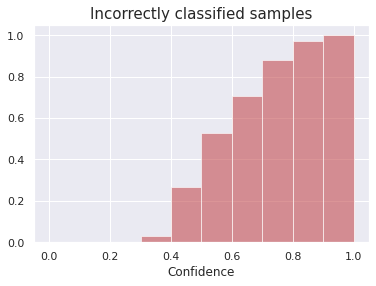

In [178]:
density=True
# plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='r', alpha=0.6)
plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='r', alpha=0.6, cumulative=1)
# plt.title('Cumulative confidence distribution in misclassified samples\n', size=14)
plt.title('Incorrectly classified samples', size=15)
plt.xlabel('Confidence')
plt.show()

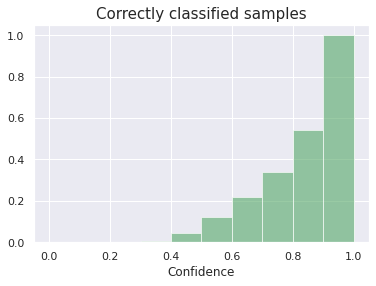

In [179]:
density=True
# plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='b', alpha=0.6)
plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='g', alpha=0.6, cumulative=1)
# plt.title('Cumulative confidence distribution in correctly classified samples\n', size=14)
plt.title('Correctly classified samples', size=15)
plt.xlabel('Confidence')
plt.show()

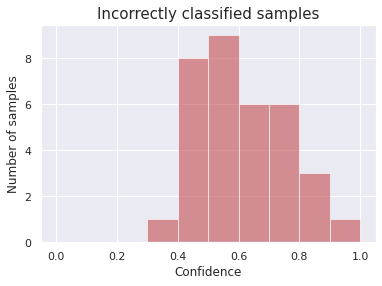

In [180]:
density=False
plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, alpha=0.6, color='r')
# plt.title('Confidence distribution in misclassified samples\n', size=14)
plt.title('Incorrectly classified samples', size=15)
plt.xlabel('Confidence')
plt.ylabel('Number of samples')
plt.show()

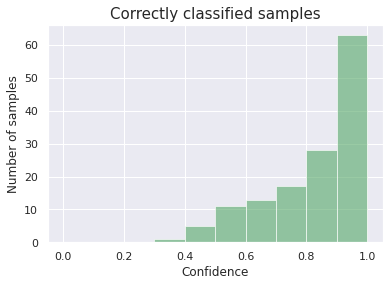

In [181]:
density=False
plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, alpha=0.6, color='g')
# plt.title('Confidence distribution in correctly classified samples\n', size=14)
plt.title('Correctly classified samples', size=15)
plt.xlabel('Confidence')
plt.ylabel('Number of samples')
plt.show()

In [155]:
# misclassified_df = create_misclassified_df(X_test=X_valid_test, y_test=y_valid_test_, y_pred=y_pred)
# assert (misclassified_df['y_true'] != misclassified_df['y_pred']).all()
# # misclassified_df

# df_merged = pd.merge(misclassified_df, df_text[['url', 'text']], on='text')
# df_merged.index = misclassified_df.index
# # df_merged

# df_confidences = df_merged[['y_true', 'y_pred']].applymap(lambda x: labels_encoded[x])
# # df_confidences.head()

# mask = y_pred != y_valid_test_

# confidence_pred = y_probs[mask, df_confidences['y_pred']]
# # confidence_pred

# confidence_true = y_probs[mask, df_confidences['y_true']]
# # confidence_true

# df_merged['conf_true'] = confidence_true.round(2)
# df_merged['conf_pred'] = confidence_pred.round(2)
# # df_merged.head()

# df_merged = df_merged[['url', 'text', 'y_true', 'conf_true', 'y_pred', 'conf_pred']]
# # df_merged.head()

# save_variable(df_merged, 'df_merged_nn')

# misclassified_urls = df_merged['url'].tolist()
# # misclassified_urls

# wrong_conf_pred = np.max(y_probs[mask], axis=1)
# # wrong_conf_pred[:3]

# right_conf_pred = np.max(y_probs[~mask], axis=1)
# # right_conf_pred[:3]

# assert y_probs.shape[0] == wrong_conf_pred.shape[0] + right_conf_pred.shape[0]

# print(f'Average confidence of misclassified samples: {np.mean(wrong_conf_pred):.4f}')
# print(f'Average confidence of correctly classified samples: {np.mean(right_conf_pred):.4f}')

# print(f'Median confidence of misclassified samples: {np.median(wrong_conf_pred):.4f}')
# print(f'Median confidence of correctly classified samples: {np.median(right_conf_pred):.4f}')

# density=None
# plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density)
# plt.title('Distribution of confidence in misclassified samples')
# plt.show()

# plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density)
# plt.title('Distribution of confidence in correctly classified samples')
# plt.show()

### Modeling - deep learning approach v1:

In [182]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [183]:
tokenizer

PreTrainedTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [184]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [185]:
# The column names to convert to TensorFlow tensors
# from transformers import DataCollatorForTokenClassification
# from transformers import DefaultDataCollator
from transformers import DataCollatorWithPadding

tokenizer_columns = tokenizer.model_input_names

# Define a batch size
batch_size = 16

# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, return_tensors="tf")
# data_collator = DefaultDataCollator(return_tensors="tf")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

tf_train_dataset = dataset_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, 
    label_cols=["label"], 
    shuffle=True,
    batch_size=batch_size,
    collate_fn=data_collator
    )

tf_eval_dataset = dataset_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, 
    label_cols=["label"], 
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator
    )

tf_train_dataset

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


<PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [186]:
tf_test_dataset = dataset_encoded["test"].to_tf_dataset(
    columns=tokenizer_columns,
    label_cols=["label"], 
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator
    )

In [187]:
num_labels = len(y_train.value_counts())

In [188]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.1
 
# Configure DistilBERT's initialization
config = DistilBertConfig(
    dropout=DISTILBERT_DROPOUT, 
    attention_dropout=DISTILBERT_ATT_DROPOUT,
    output_hidden_states=True,
    num_labels=num_labels,
    )
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
# tf_model = TFDistilBertModel.from_pretrained(
#     'distilbert-base-uncased', 
#     config=config
#     )

# # # Make tf_model layers untrainable
# for layer in tf_model.layers:
#     layer.trainable = False

In [189]:
from transformers import TFAutoModelForSequenceClassification
tf_model = (TFAutoModelForSequenceClassification.from_pretrained(
    model_ckpt, 
    config=config, 
    # num_labels=num_labels,
    )
)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_38', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [190]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# With:
# DISTILBERT_DROPOUT = 0.1
# DISTILBERT_ATT_DROPOUT = 0.1

epochs = 1000
patience = 5

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy()
    )

callback = EarlyStopping(
    monitor='val_loss',
    patience=patience,
    restore_best_weights=True
    )

history = tf_model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset, 
    epochs=epochs,
    callbacks=[callback]
    )

Epoch 1/1000
38/38 [==============================] - 48s 1s/step - loss: 1.7609 - sparse_categorical_accuracy: 0.2521 - val_loss: 1.6946 - val_sparse_categorical_accuracy: 0.4767
Epoch 2/1000
38/38 [==============================] - 37s 979ms/step - loss: 1.6179 - sparse_categorical_accuracy: 0.5893 - val_loss: 1.5302 - val_sparse_categorical_accuracy: 0.7093
Epoch 3/1000
38/38 [==============================] - 37s 980ms/step - loss: 1.4147 - sparse_categorical_accuracy: 0.6878 - val_loss: 1.3233 - val_sparse_categorical_accuracy: 0.6977
Epoch 4/1000
38/38 [==============================] - 37s 987ms/step - loss: 1.2047 - sparse_categorical_accuracy: 0.7078 - val_loss: 1.1303 - val_sparse_categorical_accuracy: 0.7093
Epoch 5/1000
38/38 [==============================] - 37s 982ms/step - loss: 1.0323 - sparse_categorical_accuracy: 0.7579 - val_loss: 0.9867 - val_sparse_categorical_accuracy: 0.7209
Epoch 6/1000
38/38 [==============================] - 38s 988ms/step - loss: 0.8964 - sp

In [175]:
# tf.keras.models.save_model(
#     tf_model, 
#     filepath='/content/drive/MyDrive/url_classification/my_model_val0.84_test0.89', 
#     overwrite=True, 
#     save_format='tf'
#     )

In [ ]:
tf_model.save('/content/drive/MyDrive/Brew/my_model_val0.87_test0.8')

In [ ]:
# ! pwd

/content/drive/.shortcut-targets-by-id/1vLy-uUgLo6ivB3DawGntodciS6HG1L58/url_classification


In [176]:
# tf.saved_model.save(tf_model, '/content/drive/MyDrive/Brew/my_model_delete')

In [ ]:
from tensorflow.keras.models import load_model
tf_model2 = load_model(filepath='/content/drive/MyDrive/Brew/my_model_delete') 

In [ ]:
tf_model2 = tf.saved_model.load('/content/drive/MyDrive/Brew/my_model_delete')

In [188]:
tf.keras.models.save_model(tf_model, '/content/drive/MyDrive/url_classification/my_model_val0.81_test0.85')

In [ ]:
tf_model

In [186]:
tf_model2 = tf.keras.models.load_model(filepath='/content/drive/MyDrive/url_classification/my_model_val0.84_test0.89') 
# # why doesn't it work when running the next cell with the loaded model?

OSError: ignored

In [ ]:
custom_objects = {"TFAutoModelForSequenceClassification": TFAutoModelForSequenceClassification}

tf_model2 = tf.keras.models.load_model('/content/drive/MyDrive/Brew/my_model_delete', custom_objects=custom_objects)

In [178]:
# loss, train_accuracy = tf_model2.evaluate(tf_train_dataset)
# print("Loss: {}\t Train Accuracy: {}".format(loss, train_accuracy))

In [191]:
loss, train_accuracy = tf_model.evaluate(tf_train_dataset)
print("Loss: {}\t Train Accuracy: {}".format(loss, train_accuracy))

38/38 [==============================] - 12s 316ms/step - loss: 0.1531 - sparse_categorical_accuracy: 0.9750
Loss: 0.15307635068893433	 Train Accuracy: 0.9749582409858704


In [192]:
loss, eval_accuracy = tf_model.evaluate(tf_eval_dataset)
print("Loss: {}\t Eval Accuracy: {}".format(loss, eval_accuracy))

6/6 [==============================] - 2s 285ms/step - loss: 0.6126 - sparse_categorical_accuracy: 0.8256
Loss: 0.6125950813293457	 Eval Accuracy: 0.8255813717842102


In [193]:
loss, test_accuracy = tf_model.evaluate(tf_test_dataset)
print("Loss: {}\t Test Accuracy: {}".format(loss, test_accuracy))

11/11 [==============================] - 4s 325ms/step - loss: 0.5771 - sparse_categorical_accuracy: 0.8372
Loss: 0.5770680904388428	 Test Accuracy: 0.8372092843055725


In [194]:
output_logits = tf_model.predict(tf_test_dataset).logits
y_pred = np.argmax(output_logits, axis=-1)

11/11 [==============================] - 5s 321ms/step


In [195]:
y_pred

array([1, 0, 1, 1, 3, 5, 4, 4, 2, 4, 1, 3, 1, 0, 3, 3, 4, 3, 2, 2, 3, 4,
       4, 5, 2, 2, 5, 3, 3, 4, 1, 2, 5, 2, 1, 1, 1, 1, 0, 1, 4, 3, 3, 2,
       1, 1, 3, 4, 3, 2, 3, 1, 4, 3, 1, 4, 3, 4, 2, 3, 5, 0, 2, 4, 3, 1,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 0, 1,
       1, 4, 5, 2, 1, 1, 4, 1, 4, 4, 3, 3, 2, 5, 0, 3, 5, 4, 1, 2, 4, 5,
       1, 4, 0, 0, 3, 2, 2, 3, 3, 0, 2, 2, 4, 2, 3, 4, 1, 2, 1, 2, 3, 3,
       4, 5, 2, 1, 2, 4, 4, 5, 3, 4, 3, 1, 3, 1, 1, 2, 2, 4, 2, 3, 3, 0,
       0, 4, 3, 3, 2, 5, 2, 5, 4, 3, 2, 1, 2, 2, 2, 3, 1, 3])

In [196]:
y_probs = tf.nn.softmax(output_logits)
y_probs[:3]

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0.08416542, 0.878566  , 0.00733409, 0.01031895, 0.00701632,
        0.01259932],
       [0.7317688 , 0.05313385, 0.0171092 , 0.01492369, 0.12416278,
        0.05890167],
       [0.08567395, 0.85064834, 0.01047275, 0.03116656, 0.0085467 ,
        0.01349174]], dtype=float32)>

In [199]:
sns.set_theme(style='white')

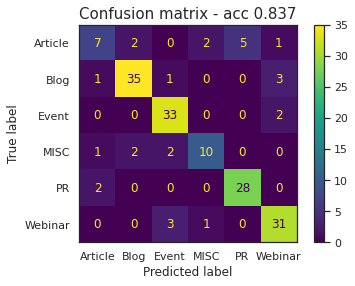


              precision    recall  f1-score   support

     Article       0.64      0.41      0.50        17
        Blog       0.90      0.88      0.89        40
       Event       0.85      0.94      0.89        35
        MISC       0.77      0.67      0.71        15
          PR       0.85      0.93      0.89        30
     Webinar       0.84      0.89      0.86        35

    accuracy                           0.84       172
   macro avg       0.81      0.79      0.79       172
weighted avg       0.83      0.84      0.83       172



In [200]:
print_confusion_matrix(y_test, y_pred, with_report=True)

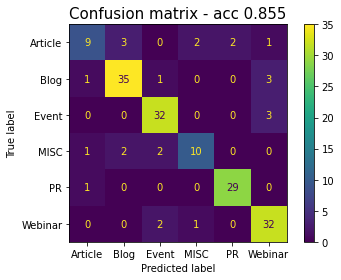


              precision    recall  f1-score   support

     Article       0.75      0.53      0.62        17
        Blog       0.88      0.88      0.88        40
       Event       0.86      0.91      0.89        35
        MISC       0.77      0.67      0.71        15
          PR       0.94      0.97      0.95        30
     Webinar       0.82      0.91      0.86        35

    accuracy                           0.85       172
   macro avg       0.84      0.81      0.82       172
weighted avg       0.85      0.85      0.85       172



In [185]:
print_confusion_matrix(y_test, y_pred, with_report=True)

In [201]:
y_pred

array([1, 0, 1, 1, 3, 5, 4, 4, 2, 4, 1, 3, 1, 0, 3, 3, 4, 3, 2, 2, 3, 4,
       4, 5, 2, 2, 5, 3, 3, 4, 1, 2, 5, 2, 1, 1, 1, 1, 0, 1, 4, 3, 3, 2,
       1, 1, 3, 4, 3, 2, 3, 1, 4, 3, 1, 4, 3, 4, 2, 3, 5, 0, 2, 4, 3, 1,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 0, 1,
       1, 4, 5, 2, 1, 1, 4, 1, 4, 4, 3, 3, 2, 5, 0, 3, 5, 4, 1, 2, 4, 5,
       1, 4, 0, 0, 3, 2, 2, 3, 3, 0, 2, 2, 4, 2, 3, 4, 1, 2, 1, 2, 3, 3,
       4, 5, 2, 1, 2, 4, 4, 5, 3, 4, 3, 1, 3, 1, 1, 2, 2, 4, 2, 3, 3, 0,
       0, 4, 3, 3, 2, 5, 2, 5, 4, 3, 2, 1, 2, 2, 2, 3, 1, 3])

In [202]:
y_test

831    1
932    4
821    1
843    1
642    3
      ..
404    2
405    2
563    3
909    1
580    3
Name: label, Length: 172, dtype: int64

In [203]:
mask = y_pred != y_test
mask

831    False
932     True
821    False
843    False
642    False
       ...  
404    False
405    False
563    False
909    False
580    False
Name: label, Length: 172, dtype: bool

In [204]:
y_pred

array([1, 0, 1, 1, 3, 5, 4, 4, 2, 4, 1, 3, 1, 0, 3, 3, 4, 3, 2, 2, 3, 4,
       4, 5, 2, 2, 5, 3, 3, 4, 1, 2, 5, 2, 1, 1, 1, 1, 0, 1, 4, 3, 3, 2,
       1, 1, 3, 4, 3, 2, 3, 1, 4, 3, 1, 4, 3, 4, 2, 3, 5, 0, 2, 4, 3, 1,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 0, 1,
       1, 4, 5, 2, 1, 1, 4, 1, 4, 4, 3, 3, 2, 5, 0, 3, 5, 4, 1, 2, 4, 5,
       1, 4, 0, 0, 3, 2, 2, 3, 3, 0, 2, 2, 4, 2, 3, 4, 1, 2, 1, 2, 3, 3,
       4, 5, 2, 1, 2, 4, 4, 5, 3, 4, 3, 1, 3, 1, 1, 2, 2, 4, 2, 3, 3, 0,
       0, 4, 3, 3, 2, 5, 2, 5, 4, 3, 2, 1, 2, 2, 2, 3, 1, 3])

In [205]:
np.array(y_test)

array([1, 4, 1, 1, 3, 0, 0, 4, 2, 4, 1, 1, 1, 0, 3, 1, 4, 3, 3, 2, 3, 4,
       4, 0, 2, 2, 5, 3, 3, 4, 1, 3, 5, 2, 1, 1, 1, 1, 4, 1, 4, 1, 3, 2,
       1, 0, 2, 0, 3, 2, 3, 1, 0, 3, 1, 4, 3, 4, 2, 3, 5, 0, 1, 4, 3, 1,
       2, 1, 4, 2, 1, 1, 2, 2, 1, 2, 4, 1, 1, 3, 2, 5, 0, 1, 1, 4, 0, 1,
       1, 4, 3, 5, 1, 0, 4, 1, 4, 4, 3, 3, 3, 5, 1, 3, 5, 4, 5, 2, 4, 5,
       1, 4, 0, 0, 3, 2, 2, 3, 3, 0, 2, 2, 0, 2, 3, 4, 1, 2, 1, 2, 3, 3,
       4, 5, 2, 5, 2, 4, 4, 5, 3, 4, 3, 1, 3, 1, 1, 2, 2, 4, 2, 3, 0, 0,
       5, 4, 3, 2, 2, 5, 2, 5, 4, 3, 2, 1, 2, 2, 2, 3, 1, 3])

In [206]:
len(y_test), len(y_pred)

(172, 172)

In [207]:
misclassified_df_nn = pd.DataFrame(
    {'y_true': y_test[mask].reset_index(drop=True).replace(labels_decoded),
     'y_pred': pd.Series(y_pred[mask]).replace(labels_decoded),
     }).set_index(y_test[mask].index)
misclassified_df_nn

y_true   y_pred
932       PR  Article
713  Article     MISC
680  Article       PR
791     Blog  Webinar
904     Blog  Webinar
524  Webinar    Event
207  Article     MISC
538  Webinar    Event
951       PR  Article
842     Blog  Webinar
105  Article     Blog
338    Event  Webinar
688  Article       PR
921  Article       PR
822     Blog    Event
329     MISC    Event
778  Article       PR
429  Webinar     MISC
626     MISC    Event
102  Article     Blog
228  Webinar    Event
912     Blog  Article
112     MISC     Blog
768  Article       PR
39      MISC     Blog
206  Article  Webinar
121     MISC  Article
299    Event  Webinar

In [208]:
# I can merge with url/text using the index of y_test, do it later.

In [209]:
df_confidences_nn = misclassified_df_nn[['y_true', 'y_pred']].applymap(lambda x: labels_encoded[x])
df_confidences_nn.head()

y_true  y_pred
932       4       0
713       0       5
680       0       4
791       1       3
904       1       3

In [210]:
y_probs_array = np.array(y_probs)

In [211]:
confidence_pred_nn = y_probs_array[mask, df_confidences_nn['y_pred']]
confidence_pred_nn

array([0.7317688 , 0.6880048 , 0.87609005, 0.8604847 , 0.9083877 ,
       0.6410547 , 0.81165284, 0.9317813 , 0.47587645, 0.9376277 ,
       0.61182654, 0.84027946, 0.8377481 , 0.8389856 , 0.851417  ,
       0.9430426 , 0.9203028 , 0.54665744, 0.9204443 , 0.8084895 ,
       0.9474942 , 0.32922313, 0.8855198 , 0.694019  , 0.7159665 ,
       0.85666305, 0.73370403, 0.9439738 ], dtype=float32)

In [212]:
confidence_true_nn = y_probs_array[mask, df_confidences_nn['y_true']]
confidence_true_nn

array([0.12416278, 0.06829616, 0.0711691 , 0.02685313, 0.02636965,
       0.26135868, 0.0567484 , 0.02559043, 0.4171192 , 0.01154234,
       0.32100692, 0.04748523, 0.11640108, 0.10977008, 0.0378789 ,
       0.01535015, 0.04170987, 0.31138265, 0.02573165, 0.14057119,
       0.0131673 , 0.25806272, 0.01883534, 0.22927858, 0.06642533,
       0.00938151, 0.05739936, 0.0123579 ], dtype=float32)

In [213]:
misclassified_df_nn['conf_true'] = confidence_true_nn.round(2)
misclassified_df_nn['conf_pred'] = confidence_pred_nn.round(2)
misclassified_df_nn.head()

y_true   y_pred  conf_true  conf_pred
932       PR  Article       0.12       0.73
713  Article     MISC       0.07       0.69
680  Article       PR       0.07       0.88
791     Blog  Webinar       0.03       0.86
904     Blog  Webinar       0.03       0.91

In [214]:
misclassified_df_nn = misclassified_df_nn[['y_true', 'conf_true', 'y_pred', 'conf_pred']]
misclassified_df_nn

y_true  conf_true   y_pred  conf_pred
932       PR       0.12  Article       0.73
713  Article       0.07     MISC       0.69
680  Article       0.07       PR       0.88
791     Blog       0.03  Webinar       0.86
904     Blog       0.03  Webinar       0.91
524  Webinar       0.26    Event       0.64
207  Article       0.06     MISC       0.81
538  Webinar       0.03    Event       0.93
951       PR       0.42  Article       0.48
842     Blog       0.01  Webinar       0.94
105  Article       0.32     Blog       0.61
338    Event       0.05  Webinar       0.84
688  Article       0.12       PR       0.84
921  Article       0.11       PR       0.84
822     Blog       0.04    Event       0.85
329     MISC       0.02    Event       0.94
778  Article       0.04       PR       0.92
429  Webinar       0.31     MISC       0.55
626     MISC       0.03    Event       0.92
102  Article       0.14     Blog       0.81
228  Webinar       0.01    Event       0.95
912     Blog       0.26  Article       0.33
112     MISC       0.02     Blog       0.89
768  Article       0.23       PR       0.69
39      MISC       0.07     Blog       0.72
206  Article       0.01  Webinar       0.86
121     MISC       0.06  Article       0.73
299    Event       0.01  Webinar       0.94

In [203]:
save_variable(misclassified_df_nn, 'df_merged_nn')

In [215]:
wrong_conf_pred = np.max(y_probs_array[mask], axis=1)
wrong_conf_pred[:3]

array([0.7317688 , 0.6880048 , 0.87609005], dtype=float32)

In [216]:
right_conf_pred = np.max(y_probs_array[~mask], axis=1)
right_conf_pred[:3]

array([0.878566  , 0.85064834, 0.9120738 ], dtype=float32)

In [217]:
assert y_probs_array.shape[0] == wrong_conf_pred.shape[0] + right_conf_pred.shape[0]

In [291]:
print(f'Confidence of incorrectly classified samples \t- Median: {np.median(wrong_conf_pred):.4f}, Mean: {np.mean(wrong_conf_pred):.4f}.')
print(f'Confidence of correctly classified samples \t- Median: {np.median(right_conf_pred):.4f}, Mean: {np.mean(right_conf_pred):.4f}.')

Confidence of incorrectly classified samples 	- Median: 0.8021, Mean: 0.7702.
Confidence of correctly classified samples 	- Median: 0.9231, Mean: 0.8750.


In [259]:
sns.set_theme()

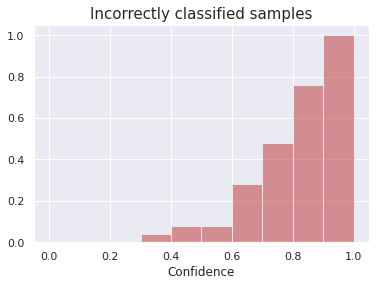

In [310]:
density=True
# plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='r', alpha=0.6)
plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='r', alpha=0.6, cumulative=1)
# plt.title('Cumulative confidence distribution in misclassified samples\n', size=14)
plt.title('Incorrectly classified samples', size=15)
plt.xlabel('Confidence')
plt.show()

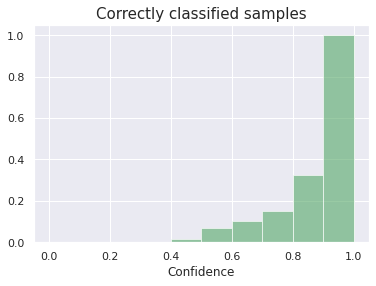

In [311]:
density=True
# plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='b', alpha=0.6)
plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, color='g', alpha=0.6, cumulative=1)
# plt.title('Cumulative confidence distribution in correctly classified samples\n', size=14)
plt.title('Correctly classified samples', size=15)
plt.xlabel('Confidence')
plt.show()

In [241]:
total_count = len(wrong_conf_pred)
weights = [1 / total_count for x in wrong_conf_pred]

In [244]:
weights = 0.04

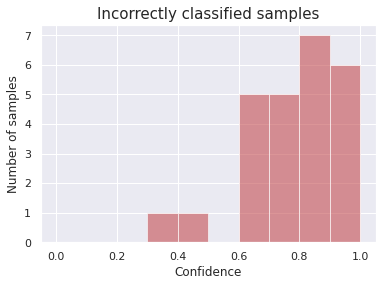

In [303]:
density=False
plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density, alpha=0.6, color='r')
# plt.title('Confidence distribution in misclassified samples\n', size=14)
plt.title('Incorrectly classified samples', size=15)
plt.xlabel('Confidence')
plt.ylabel('Number of samples')
plt.show()

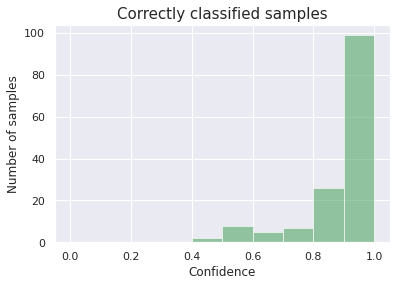

In [304]:
density=False
plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density, alpha=0.6, color='g')
# plt.title('Confidence distribution in correctly classified samples\n', size=14)
plt.title('Correctly classified samples', size=15)
plt.xlabel('Confidence')
plt.ylabel('Number of samples')
plt.show()

In [ ]:
# misclassified_df = create_misclassified_df(X_test=X_valid_test, y_test=y_test, y_pred=y_pred)
# assert (misclassified_df['y_true'] != misclassified_df['y_pred']).all()
# misclassified_df

# df_merged = pd.merge(misclassified_df, df_text[['url', 'text']], on='text')
# df_merged.index = misclassified_df.index
# # df_merged

# df_confidences = df_merged[['y_true', 'y_pred']].applymap(lambda x: labels_encoded[x])
# # df_confidences.head()

# mask = y_pred != y_valid_test_

# confidence_pred = y_probs[mask, df_confidences['y_pred']]
# # confidence_pred

# confidence_true = y_probs[mask, df_confidences['y_true']]
# # confidence_true

# df_merged['conf_true'] = confidence_true.round(2)
# df_merged['conf_pred'] = confidence_pred.round(2)
# # df_merged.head()

# df_merged = df_merged[['url', 'text', 'y_true', 'conf_true', 'y_pred', 'conf_pred']]
# # df_merged.head()

# save_variable(df_merged, 'df_merged_nn')

# misclassified_urls = df_merged['url'].tolist()
# # misclassified_urls

# wrong_conf_pred = np.max(y_probs[mask], axis=1)
# # wrong_conf_pred[:3]

# right_conf_pred = np.max(y_probs[~mask], axis=1)
# # right_conf_pred[:3]

# assert y_probs.shape[0] == wrong_conf_pred.shape[0] + right_conf_pred.shape[0]

# print(f'Average confidence of misclassified samples: {np.mean(wrong_conf_pred):.4f}')
# print(f'Average confidence of correctly classified samples: {np.mean(right_conf_pred):.4f}')

# print(f'Median confidence of misclassified samples: {np.median(wrong_conf_pred):.4f}')
# print(f'Median confidence of correctly classified samples: {np.median(right_conf_pred):.4f}')

# density=None
# plt.hist(wrong_conf_pred, bins=np.linspace(0, 1, 11), density=density)
# plt.title('Distribution of confidence in misclassified samples')
# plt.show()

# plt.hist(right_conf_pred, bins=np.linspace(0, 1, 11), density=density)
# plt.title('Distribution of confidence in correctly classified samples')
# plt.show()

### Modeling - deep learning approach v2:

In [ ]:
# Cell 9
test_size = 0.15
random_state = 0

# Important cell # 9
column_used = 'w2v_text'

X = df_text[[column_used]]
y = df_text[TARGET]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                    test_size=test_size,
                                                    stratify=y, 
                                                    random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                    test_size=1/((1-test_size)/test_size),
                                                    stratify=y_train_val, 
                                                    random_state=random_state)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((483, 1), (104, 1), (104, 1), (483,), (104,), (104,))

In [ ]:
from datasets.dataset_dict import DatasetDict
from datasets import Dataset

dataset = DatasetDict({
    'train': Dataset.from_dict({'text': X_train[column_used],'label': y_train}),
    'validation': Dataset.from_dict({'text': X_val[column_used],'label': y_val}),
    'test': Dataset.from_dict({'text': X_test[column_used],'label': y_test})
    })

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 483
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 104
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 104
    })
})

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained('distilgpt2')

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenizer2.pad_token = tokenizer2.eos_token

In [ ]:
tokenizer2

PreTrainedTokenizerFast(name_or_path='distilgpt2', vocab_size=50257, model_max_len=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'})

In [ ]:
tokenizer2.special_tokens_map

{'bos_token': '<|endoftext|>',
 'eos_token': '<|endoftext|>',
 'unk_token': '<|endoftext|>',
 'pad_token': '<|endoftext|>'}

In [ ]:
transformers.__version__

'4.25.1'

In [ ]:
datasets.__version__

'2.7.1'

In [ ]:
# ds = datasets.Dataset.from_pandas(df_text)

In [ ]:
# ds

Dataset({
    features: ['text', 'label', 'url', 'cleaned_text', 'lemmatized_text', 'lemmatized_cleaned_text', 'w2v_text'],
    num_rows: 691
})

In [ ]:
# ds[0]

{'text': "2020 User Summit. 2020 User Summit  *UPDATE - March 12th, 2020*  With the ongoing coverage of the seriousness of the global outbreak of the COVID-19 virus and the potential effects, we want you to know that our priority is to keep our Summit attendees safe and informed.  While our AC User Summit is just more than a month away, we are sensitive to our clients' travel and safety. Out of an abundance of caution and concern, we have decided to cancel the 2020 User Summit in the best interest of all involved.  While we hope that we all can and will participate in normal activities as much as possible at this time, this is a unique situation that requires extra consideration for our clients and our employees.  Registration fees will be credited back to all clients who have registered for the Summit.  Thank you for your patience and understanding as we work through unprecedented times together.",
 'label': 4,
 'url': 'Not provided',
 'cleaned_text': '2020 User Summit 2020 User Summi

In [ ]:
ds_encoded2 = ds.map(lambda row: tokenizer2(row['w2v_text'], 
                                          padding='max_length', 
                                          truncation=True,
                                          max_length=512 # is this ok? i just put a number
                                          ), 
                    batched=True,
                    remove_columns=['url', 'text', 'cleaned_text', 'lemmatized_text', 'lemmatized_cleaned_text', 'w2v_text'],
                    )

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
ds_encoded2

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 691
})

In [ ]:
ds_encoded2[0]

{'label': 4,
 'input_ids': [42334,
  2836,
  14237,
  764,
  12131,
  2836,
  14237,
  220,
  220,
  1635,
  4296,
  532,
  9960,
  1105,
  400,
  837,
  12131,
  1635,
  220,
  220,
  351,
  262,
  7044,
  5197,
  286,
  262,
  32095,
  286,
  262,
  3298,
  17645,
  286,
  262,
  39849,
  312,
  12,
  1129,
  9471,
  290,
  262,
  2785,
  3048,
  837,
  356,
  765,
  345,
  284,
  760,
  326,
  674,
  8475,
  318,
  284,
  1394,
  674,
  14237,
  21736,
  3338,
  290,
  7981,
  764,
  220,
  220,
  981,
  674,
  936,
  2836,
  14237,
  318,
  655,
  517,
  621,
  257,
  1227,
  1497,
  837,
  356,
  389,
  8564,
  284,
  674,
  7534,
  705,
  3067,
  290,
  3747,
  764,
  503,
  286,
  281,
  20038,
  286,
  13041,
  290,
  2328,
  837,
  356,
  423,
  3066,
  284,
  14241,
  262,
  12131,
  2836,
  14237,
  287,
  262,
  1266,
  1393,
  286,
  477,
  2950,
  764,
  220,
  220,
  981,
  356,
  2911,
  326,
  356,
  477,
  460,
  290,
  481,
  8277,
  287,
  3487,
  4568,
  355,
  881

In [ ]:
ds_encoded2 = ds_encoded2.with_format('tf')

In [ ]:
ds_encoded2[0]

{'label': <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 'input_ids': <tf.Tensor: shape=(512,), dtype=int64, numpy=
 array([42334,  2836, 14237,   764, 12131,  2836, 14237,   220,   220,
         1635,  4296,   532,  9960,  1105,   400,   837, 12131,  1635,
          220,   220,   351,   262,  7044,  5197,   286,   262, 32095,
          286,   262,  3298, 17645,   286,   262, 39849,   312,    12,
         1129,  9471,   290,   262,  2785,  3048,   837,   356,   765,
          345,   284,   760,   326,   674,  8475,   318,   284,  1394,
          674, 14237, 21736,  3338,   290,  7981,   764,   220,   220,
          981,   674,   936,  2836, 14237,   318,   655,   517,   621,
          257,  1227,  1497,   837,   356,   389,  8564,   284,   674,
         7534,   705,  3067,   290,  3747,   764,   503,   286,   281,
        20038,   286, 13041,   290,  2328,   837,   356,   423,  3066,
          284, 14241,   262, 12131,  2836, 14237,   287,   262,  1266,
         1393,   286,   477,  295

In [ ]:
tokenizer2.decode(ds_encoded2[0]['input_ids'])

"2020 user summit. 2020 user summit   * update - march 12th, 2020 *   with the ongoing coverage of the seriousness of the global outbreak of the covid-19 virus and the potential effects, we want you to know that our priority is to keep our summit attendees safe and informed.   while our ac user summit is just more than a month away, we are sensitive to our clients'travel and safety. out of an abundance of caution and concern, we have decided to cancel the 2020 user summit in the best interest of all involved.   while we hope that we all can and will participate in normal activities as much as possible at this time, this is a unique situation that requires extra consideration for our clients and our employees.   registration fees will be credited back to all clients who have registered for the summit.   thank you for your patience and understanding as we work through unprecedented times together.<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><

In [ ]:
tokenizer2.decode(ds_encoded2[0]['input_ids'], skip_special_tokens=True)

"2020 user summit. 2020 user summit   * update - march 12th, 2020 *   with the ongoing coverage of the seriousness of the global outbreak of the covid-19 virus and the potential effects, we want you to know that our priority is to keep our summit attendees safe and informed.   while our ac user summit is just more than a month away, we are sensitive to our clients'travel and safety. out of an abundance of caution and concern, we have decided to cancel the 2020 user summit in the best interest of all involved.   while we hope that we all can and will participate in normal activities as much as possible at this time, this is a unique situation that requires extra consideration for our clients and our employees.   registration fees will be credited back to all clients who have registered for the summit.   thank you for your patience and understanding as we work through unprecedented times together."

In [ ]:
tf_ds = ds_encoded2.to_tf_dataset(
    batch_size=4,
    shuffle=True
)

In [ ]:
X = next(iter(tf_ds))

In [ ]:
X

{'label': <tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 7, 0, 0])>,
 'input_ids': <tf.Tensor: shape=(4, 512), dtype=int64, numpy=
 array([[11299,  7625,   416, ..., 50256, 50256, 50256],
        [   88, 35505,  4078, ...,   331, 35505,   220],
        [45609,   384,    78, ..., 50256, 50256, 50256],
        [ 1069, 11766,  4875, ..., 50256, 50256, 50256]])>,
 'attention_mask': <tf.Tensor: shape=(4, 512), dtype=int64, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])>}

In [ ]:
# Total number of minibatches in the dataset
len(tf_ds)

173

In [ ]:
num_labels

NameError: ignored

In [ ]:
from transformers import TFAutoModelForSequenceClassification
model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

## Working with validation split

In [ ]:
# Cell 9
test_size = 0.2
random_state = 0

# Important cell # 9
column_used = 'w2v_text'

X = df_text[[column_used]]
y = df_text[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size,
                                                    stratify=y, 
                                                    random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
dataset = DatasetDict({
    'train':Dataset.from_dict({'text': X_train[column_used],'label': y_train}),
    'test':Dataset.from_dict({'text': X_test[column_used],'label': y_test})
    })

dataset

In [ ]:
train_ds = dataset['train']

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

dataset_encoded

tf_model = TFAutoModel.from_pretrained(model_ckpt)

dataset_encoded.reset_format()

def extract_hidden_states(batch):
    # First convert text to tokens
    inputs = tokenizer(batch["text"], padding=True, 
                       truncation=True, return_tensors='tf')
    # Extract last hidden states
    outputs = tf_model(inputs)
     # Return vector for [CLS] token
    return {"hidden_state": outputs.last_hidden_state[:,0].numpy()}

dataset_hidden = dataset_encoded.map(extract_hidden_states, batched=True, batch_size=16)
dataset_hidden

X_train_ = np.array(dataset_hidden["train"]["hidden_state"])
y_train_ = np.array(dataset_hidden["train"]["label"])

X_train_.shape, y_train_.shape

In [ ]:
X_test_ = np.array(dataset_hidden["test"]["hidden_state"])
y_test_ = np.array(dataset_hidden["test"]["label"])

In [ ]:
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train_, y_train_)
lr_clf.score(X_test_, y_test_)

In [ ]:
rf_clf = fit_model(RandomForestClassifier(max_depth=10,
                                            n_estimators=50,
                                            random_state=0,
                                          ),
                X_train_, 
                y_train_)

y_test_pred = predict(rf_clf, X_test_)

print_confusion_matrix(y_test, y_test_pred, with_report=True)

In [ ]:
svc_clf = fit_model(SVC(C=1, 
                    class_weight='balanced'
                    ),
                X_train_, 
                y_train_)

y_test_pred = predict(svc_clf, X_test_)

print_confusion_matrix(y_test, y_test_pred, with_report=True)

In [ ]:
lr_clf = fit_model(LogisticRegression(max_iter=3000, 
                                  #  class_weight='balanced', 
                                   ), 
                X_train_, 
                y_train_)

y_test_pred = predict(lr_clf, X_test_)

print_confusion_matrix(y_test, y_test_pred, with_report=True)

In [ ]:
dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

In [ ]:
dataset_encoded

In [ ]:
# The column names to convert to TensorFlow tensors
from transformers import DataCollatorWithPadding
from transformers import DataCollatorForTokenClassification
from transformers import DefaultDataCollator


tokenizer_columns = tokenizer.model_input_names

# Define a batch size
batch_size = 16

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
# data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, return_tensors="tf")
# data_collator = DefaultDataCollator(return_tensors="tf")


tf_train_dataset = dataset_encoded["train"].to_tf_dataset(columns=tokenizer_columns, 
                                                           label_cols=["label"], shuffle=True,
                                                           batch_size=batch_size,
                                                           collate_fn=data_collator
                                                          )

tf_train_dataset

In [ ]:
tokenizer_columns

In [ ]:
dataset_encoded["train"]['input_ids', 'attention_mask']

In [ ]:
tf_test_dataset = dataset_encoded["test"].to_tf_dataset(columns=tokenizer_columns, 
                                                               label_cols=["label"], shuffle=False,
                                                               batch_size=batch_size,
                                                               collate_fn=data_collator
                                                              )

In [ ]:
tf_model_vs = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels))

In [ ]:
tf_train_array = np.array(tf_train_dataset)

In [ ]:
tf_train_dataset

In [ ]:
tf_train_array

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

epochs = 100
patience = 3
validation_split = 0.15

tf_model_vs.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=tf.metrics.SparseCategoricalAccuracy()
)

callback = EarlyStopping(monitor='val_loss',
                          patience=patience,
                          restore_best_weights=True)

tf_model_vs.fit(tf_train_array, 
             validation_split=validation_split, 
             epochs=epochs,
             callbacks=[callback]
             )